In [1]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util

import behavior as butil
import plotting as putil
import google_drive as gdrive
import trajectory as traj
from matplotlib.gridspec import GridSpec


import matplotlib.gridspec as gridspec
import stats as st

In [2]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
# if util.get_os() == 'Linux':
#     rootdir = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'
# elif util.get_os() == 'Darwin':
#     rootdir = '/home/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
# else:
#     rootdir=None
#     print("Unknown os: {}".format(util.get_os()))
rootdir = util.get_rootdir()
experiment = 'PAM_activation_fed-flies'

src_dir = os.path.join(rootdir, experiment)
# # src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
# print(src_dir)
fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
print(fig_id)
savedir = '{}/jyr/{}'.format(rootdir, experiment)
# savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Edge_Tracking/Data/PAM_activation_fed-flies
Saving figures to:
    /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures


In [4]:
# copy files?
# There are 2 sources from Andy/Chad:  mutltiple_reinforcemnet (7 paired) and not_reinforced/reinforced (15)
copy_files=False
orig_log = glob.glob(os.path.join(src_dir, '*', '*.log'))
copied_log = glob.glob(os.path.join(savedir, 'raw', '*.log'))
new_src_dir = os.path.join(savedir, 'raw')

if len(orig_log)>0 and len(copied_log)!=len(orig_log):
#     copy_files=True
    print("Need to copy files from orig loc to <{}>".format(os.path.join(savedir, 'raw')))
# else:
#     src_dir = os.path.join(savedir, 'raw')
#     print("Found {} .log file in new src dir: {}".format(len(copied_log), src_dir))
if copy_files:
    import shutil
    for tmp_src in os.listdir(os.path.join(src_dir, 'multiple_reinforcement')):
        curr_logs = glob.glob(os.path.join(src_dir, 'multiple_reinforcement', tmp_src, '*.log'))
        for fn in curr_logs:
            fbase = os.path.split(fn)[-1]
            if os.path.exists( os.path.join(new_src_dir, fbase)):
                continue
            shutil.copy(fn, os.path.join(new_src_dir, fbase))

Need to copy files from orig loc to </home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw>


In [5]:
# There are 2 sources from Andy/Chad:  mutltiple_reinforcemnet (7 paired) and not_reinforced/reinforced (15)
copy_files=False
print("Orig src: {}".format(src_dir))
orig_log = glob.glob(os.path.join(src_dir,  '*','*.log'))
copied_log = glob.glob(os.path.join(savedir, 'raw', '*.log'))
new_src_dir = os.path.join(savedir, 'raw')
if copy_files:
    import shutil
    #for tmp_src in os.listdir(os.path.join(src_dir, 'not_reinforced')):
    curr_logs = glob.glob(os.path.join(src_dir, '*', '*.log'))
    for fn in curr_logs:
        fbase = os.path.split(fn)[-1]
        if os.path.exists( os.path.join(new_src_dir, fbase)):
            continue
        shutil.copy(fn, os.path.join(new_src_dir, fbase))
copy_files=False
src_dir = new_src_dir
print("New src: {}".format(src_dir))

Orig src: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/PAM_activation_fed-flies
New src: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw


## double-check actiation inside/outside first

In [6]:
check_leds = False
if check_leds:
    fn = '08152020-164450_Fly2_fed_lights.log'
    fpath = os.path.join(src_dir, fn)
    df0 = pd.read_csv(fpath, encoding='latin' )
    df_ = butil.load_dataframe(fpath, experiment=experiment)
    # df_ = butil.correct_manual_conditions(df_, experiment, logdf=logdf)
    df_ = butil.process_df(df_)
    # print(df0.columns)
    # df_['condition'].unique()
    # --- get odor MFC if needed
    odor_mfc = butil.get_odor_mfc(df0)
    odor_mfc
    df0['led_on'] = df0['led1_stpt']==0
    df0['instrip'] = df0[odor_mfc]>0
    #  plot ------
    fig, axn = pl.subplots(1,3)
    sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
    sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')

    fig, axn = pl.subplots(1,3)
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='led_on', ax=axn[2],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')

# Load and save COMBINED datafiles

In [7]:
create_new=False
strip_width=50
strip_sep=1000
# ---------------------------------
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, verbose=False, is_gdrive=False,
                        return_loginfo=False)
# is_csv = False
if not create_new:
    print("Loading old files.")
    df_fpath = os.path.join(savedir, 'combined_df0.pkl')
    df0_all = butil.load_df(df_fpath)
else:
    df0_all = butil.load_combined_df(log_files=log_files, logdf=None, src_dir=src_dir,
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=False, create_new=create_new,
                                parse_filename=True, remove_invalid=True, process=True, 
                                combined_fbase='combined_df0')
# Make some fixes
df0_all.loc[df0_all['condition']=='pamchr_fed_no_lights', 'condition'] = 'no_lights'
df0_all.loc[df0_all['condition']=='pamchr_fed_lights', 'condition'] = 'lights'
df0_all.loc[df0_all['condition']=='pamchr_fed_single', 'condition'] = 'single'
df0_all.loc[df0_all['condition']=='pam_activation', 'condition'] = 'lights'
df0_all.loc[df0_all['condition']=='no_lights', 'led_on'] = False
# manually assign led signal to OFF
df0_all.loc[df0_all['condition']=='no_lights', 'led1_stpt'] = 1 # OLD files

condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

if create_new: # save
    df_fpath = os.path.join(savedir, 'combined_df0.pkl')
    print("Saving combined df to: {}".format(savedir))
    butil.save_df(df0_all, df_fpath)
create_new=False


Checking parent dir.
Found 53 tracking files.
Loading old files.
Found 3 conditions:
no_lights
lights
single


## also add NEW files

In [308]:
create_new=True
# ------------------------------
new_logfiles = glob.glob(os.path.join(src_dir, 'new', '*.log'))
if not create_new:
    print("Adding {} new files.".format(len(new_logfiles)))
    df1_fpath = os.path.join(savedir, 'combined_df1.pkl')
    df1_all = butil.load_df(df1_fpath)
else:
    print("creating new...")
    df1_all = butil.load_combined_df(log_files=new_logfiles, logdf=None, src_dir=src_dir,
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=False, create_new=create_new,
                                parse_filename=True, remove_invalid=True, process=True, combined_fbase='combined_df1')
    # fix some condition info
    df1_all['led_on'] = df1_all['led1_stpt']==1
    df1_all.loc[df1_all['condition']=='pam_activation', 'condition'] = 'lights'
    df1_all.loc[df1_all['condition']=='strip_grid', 'condition'] = 'no_lights'
    df1_all.loc[df1_all['filename']=='20230130-133449_PAM_activation_fly2-PAM-ChR-fed_000', 'condition'] = 'no_lights'
    # save
    df1_fpath = os.path.join(savedir, 'combined_df1.pkl')
    butil.save_df(df1_all, df1_fpath)

print(df0_all.shape, df1_all.shape)
create_new=False

creating new...
Processing 7 tracking files.
Creating combined df
[WARNING] ['20230130-133449_PAM_activation_fly2-PAM-ChR-fed_000']: Found bad skips, removing 192 of 17492 samples.


/home/julianarhee/Repositories/plume-tracking/behavior.py:314: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(fpath, encoding='latin' )#, sep=",", skiprows=[1], header=0,


[WARNING] ['20230222-164642_PAM_activation_fly3-PAM-ChR-fedF_000']: Found bad skips, removing 18100 of 58866 samples.
[WARNING] ['20230130-144015_PAM_activation_fly2-PAM-ChR-fed-ythresh0_001']: Found bad skips, removing 9581 of 123846 samples.


/home/julianarhee/Repositories/plume-tracking/behavior.py:733: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat(dlist, axis=0)


Correcting experiment conditions: PAM_activation_fed-flies
[bout 2]  too short outstrip, should be IN
[bout 3]  too short instrip, should be OUT
[bout 7]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 21]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 24]  too short outstrip, should be IN
[bout 11]  too short instrip, should be OUT
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 5]  too short instrip, should be OUT
[bout 12]  too short outstrip, should be IN
[bout 13]  too short instrip, should be OUT
[bout 19]  too short instrip, should be OUT
[bout 22]  too short outstrip, should be IN
[bout 30]  too short outstrip, should be IN
[bout 48]  too short 

[bout 19]  too short instrip, should be OUT
[bout 37]  too short instrip, should be OUT
[bout 81]  too short instrip, should be OUT
[bout 82]  too short outstrip, should be IN
[bout 124]  too short outstrip, should be IN
[bout 125]  too short instrip, should be OUT
[bout 4]  too short outstrip, should be IN
[bout 8]  too short outstrip, should be IN
[bout 9]  too short instrip, should be OUT
[bout 13]  too short instrip, should be OUT
[bout 15]  too short instrip, should be OUT
[bout 20]  too short outstrip, should be IN
[bout 23]  too short instrip, should be OUT
[bout 24]  too short outstrip, should be IN
[bout 25]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 31]  too short instrip, should be OUT
[bout 35]  too short instrip, should be OUT
[bout 37]  too short instrip, should be OUT
[bout 38]  too short outstrip, should be IN
[bout 40]  too short outstrip, should be IN
[bout 41]  too short instrip, should be OUT
[bout 43]  too short instrip, sho

[bout 3]  too short instrip, should be OUT
[bout 4]  too short outstrip, should be IN
[bout 8]  too short outstrip, should be IN
[bout 9]  too short instrip, should be OUT
[bout 13]  too short instrip, should be OUT
[bout 14]  too short outstrip, should be IN
[bout 15]  too short instrip, should be OUT
[bout 16]  too short outstrip, should be IN
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 24]  too short outstrip, should be IN
[bout 28]  too short outstrip, should be IN
[bout 29]  too short instrip, should be OUT
[bout 42]  too short outstrip, should be IN
[bout 43]  too short instrip, should be OUT
[bout 51]  too short instrip, should be OUT
[bout 60]  too short outstrip, should be IN
[bout 61]  too short instrip, should be OUT
[bout 62]  too short outstrip, should be IN
[bout 63]  too short instrip, should be OUT
[bout 64]  too short outstrip, should be IN
[bout 9]  too short instrip, should be OUT
[bout 10]  too short outstrip, should

[bout 5]  too short instrip, should be OUT
[bout 6]  too short outstrip, should be IN
[bout 17]  too short instrip, should be OUT
[bout 18]  too short outstrip, should be IN
[bout 19]  too short instrip, should be OUT
[bout 29]  too short instrip, should be OUT
[bout 30]  too short outstrip, should be IN
[bout 31]  too short instrip, should be OUT
[bout 32]  too short outstrip, should be IN
[bout 38]  too short outstrip, should be IN
[bout 59]  too short instrip, should be OUT
[bout 63]  too short instrip, should be OUT
[bout 92]  too short outstrip, should be IN
[bout 93]  too short instrip, should be OUT
[bout 96]  too short outstrip, should be IN
[bout 97]  too short instrip, should be OUT
[bout 98]  too short outstrip, should be IN
[bout 99]  too short instrip, should be OUT
[bout 15]  too short instrip, should be OUT
[bout 25]  too short instrip, should be OUT
[bout 26]  too short outstrip, should be IN
[bout 82]  too short outstrip, should be IN
[bout 83]  too short instrip, shou

In [ ]:
# df1_all['led_on'] = df1_all['led1_stpt']==1

In [309]:
df1_all['condition'].unique(), df0_all['condition'].unique()

(array(['no_lights', 'lights'], dtype=object),
 array(['no_lights', 'lights', 'single'], dtype=object))

In [310]:
# COMBINE ALL THE DAYA
#df0 = pd.concat([df0_all[df0_all['condition']=='lights'], df1_all]).reset_index(drop=True)
df0 = pd.concat([df0_all, df1_all]).reset_index(drop=True)

df0.shape

(2378039, 43)

## plot each individual's conditions

In [203]:
importlib.reload(putil)

<module 'plotting' from '/home/julianarhee/Repositories/plume-tracking/plotting.py'>

In [311]:
example_flies = ['20230222-fly1', '20230201-fly1', '20230201-fly2']
for ri, (fly_id, flydf) in enumerate(df0.groupby('fly_id')):
    if fly_id in example_flies:
        print(fly_id)

20230201-fly1
20230201-fly2
20230222-fly1


/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/by-individual


<IPython.core.display.Javascript object>


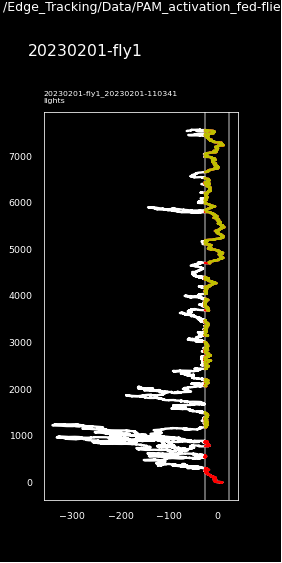

20230201-fly1


<IPython.core.display.Javascript object>


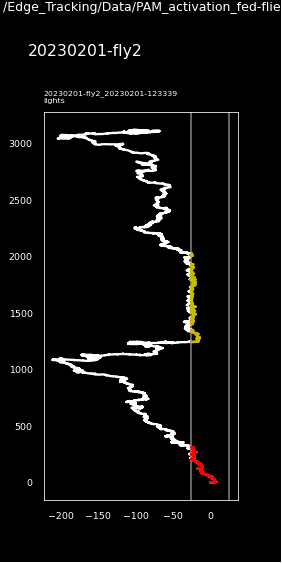

20230201-fly2


<IPython.core.display.Javascript object>


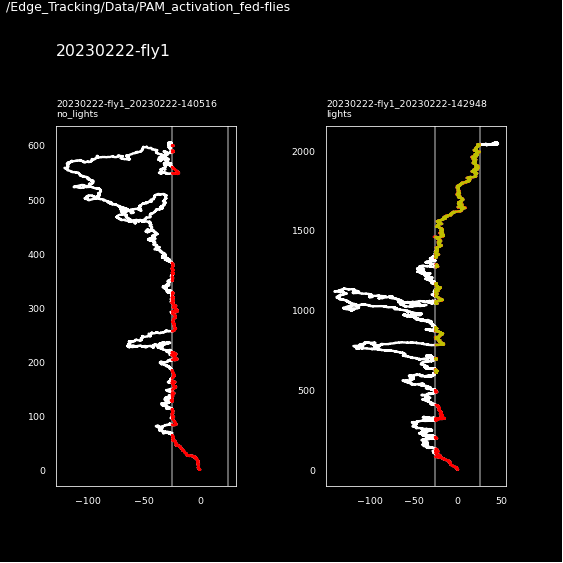

20230222-fly1


In [314]:
plot_each = True
example_flies = ['20230222-fly1', '20230201-fly1', '20230201-fly2']
# ---------------------------------
if plot_each:
    curr_figdir = os.path.join(figdir, 'by-individual') #print(curr_figdir)
    if not os.path.exists(curr_figdir):
        os.makedirs(curr_figdir)
    print(curr_figdir)
    for ri, (fly_id, flydf) in enumerate(df0[df0['fly_id'].isin(example_flies)].groupby('fly_id')):
        fig = putil.plot_one_flys_trials(flydf, sharey=False, sharex=True, bool_vars=bool_vars, bool_colors=bool_colors)
        pl.subplots_adjust(left=0.1, right=0.9, wspace=0.5, top=0.8)
        util.label_figure(fig, fig_id)
        fig.text(0.1, 0.9, fly_id) #'{} - {}'.format(fig_id, fly_id))
        pl.savefig(os.path.join(curr_figdir, '{}.png'.format(fly_id)))
        pl.savefig(os.path.join(curr_figdir, '{}.svg'.format(fly_id)))
        if fly_id in example_flies:
            print(fly_id)
            pl.savefig(os.path.join(curr_figdir, '{}.svg'.format(fly_id)))
        #print(curr_figdir)

In [315]:
df0[['filename', 'strip_type']].drop_duplicates().groupby('strip_type').count()

,filename
strip_type,
constant,7
gradient,51


#### NO DUPLICATE CONDITIONS

In [316]:

# exclude repeat conditions
excl = ['20230222-140516_strip_grid_fly1-PAM-ChR-fedF_000'] 
# et_tmp = df0[(df0['fly_id'].isin(incl_flyids))\
#            & (~df0['filename'].isin(excl))\
#            & (df0['condition'].isin(['lights', 'no_lights']))].copy()
et_tmp = df0[(~df0['filename'].isin(excl))\
           & (df0['condition'].isin(['lights', 'no_lights']))].copy()

In [317]:
d_list=[]
for fly_id, df_ in et_tmp.groupby('fly_id'):
    n_unique = df_.groupby('condition')['filename'].nunique()
    if any(n_unique>1):
        max_durs = df_.groupby(['condition', 'filename'], as_index=False)\
                      .apply(lambda x: x['rel_time'].iloc[-1]).rename(columns={None:'dur'}) #.reset_index()
        for c, c_ in max_durs.groupby('condition'):
            max_fn = c_.max()['filename']
            add_ = df_[df_['filename']==max_fn]
            d_list.append(add_)
    else:
        d_list.append(df_)
df1 = pd.concat(d_list).reset_index(drop=True)

In [318]:
df1[['fly_id', 'filename', 'condition']].drop_duplicates().groupby('fly_id')['condition'].nunique()

fly_id
20200815-fly1     2
20200815-fly2     2
20200815-fly3     2
20200816-fly4     2
20200816-fly5     2
20200816-fly6     2
20200816-fly7     2
20200817-fly10    2
20200817-fly11    2
20200817-fly12    2
20200817-fly13    2
20200817-fly8     2
20200817-fly9     2
20200914-fly0     2
20200914-fly1     2
20200914-fly2     2
20200916-fly1     2
20200923-fly1     2
20200925-fly1     2
20200925-fly2     2
20230130-fly2     2
20230201-fly1     1
20230201-fly2     1
20230222-fly1     1
20230222-fly3     1
Name: condition, dtype: int64

In [319]:
first_within_trial = 20230201
#etdf = df_fp.copy().reset_index(drop=True)
df1['epoch'] = 'ledoff'
df1['block'] = None
for fn, df_ in df1.groupby('filename'):
    fpath = os.path.join(src_dir, 'new', '{}.log'.format(fn)) if fn.startswith('2023') else os.path.join(src_dir, '{}.log'.format(fn))
    cfg = butil.load_experiment_config(fpath)
    if cfg is None:
        y_thresh = 500
    else:
        print("found config")
        y_thresh = cfg['experiment']['y_thresh']
    y_thresh2 = y_thresh*2
    
    df_ = putil.zero_trajectory(df_)
    if (df_['date'].unique()[0] >= first_within_trial) and y_thresh>0:
            ypos_blocks = [0, y_thresh] #np.arange(0, df_['ft_posy'].max(), y_thresh)
            ledon_starts = ypos_blocks[1::2]
            for bi, thresh_val in enumerate(ypos_blocks):
                ts = df_.loc[  (df_['ft_posy']>=thresh_val) ].iloc[0]['rel_time']
                df_.loc[df_['rel_time']>=ts, 'block'] = bi
                if thresh_val in ledon_starts:
                    #df_.loc[ (df_['ft_posy']>=thresh_val) & (df_['ft_posy']<(thresh_val+y_thresh)), 'epoch'] = 'ledon'
                    df_.loc[ df_['block']==bi, 'epoch'] = 'ledon'
    else:
        if df_['condition'].unique()[0] == 'no_lights':
            df_['block'] = 0
            df_['epoch'] = 'ledoff'
        else:
            #df_['condition'].unique()[0] == 'lights'
            df_['block'] = 1
            df_['epoch'] = 'ledon'
    # assign block IX to PRE-odor period
    min_real_block = df_[~df_['block'].isna()]['block'].min()
    ts = df_[df_['block']==min_real_block].iloc[0]['rel_time']
    df1.loc[ (df1['filename']==fn) & (df1['rel_time']<ts) , 'block'] = -1
    #print(fn, df_['block'].unique())
    df1.loc[df_.index, 'epoch'] = df_['epoch']
    df1.loc[df_.index, 'block'] = df_['block']
    # some files have LED on at ft_posy < 500... (but single value, rounding error, 499.99)
#     if fn in ['11162021-110343_PAMGTACR1_Fly1_003','20230312-122906_PAM_activation_fly1-PAM-GtACR1-2do-fastedF_000', '10272021-161524_PAM_GTACR1_thresh_lights_on_Fly1_007']:
#         df0.loc[ (df0['filename']==fn) & (df0['block']==0), 'led_on'] = False
#         df0.loc[ (df0['filename']==fn) & (df0['block']==0), 'led1_stpt'] = 1
df1['bout_type'] = ['instrip' if i==1 else 'outstrip' for i in df1['instrip']]

found config
found config
found config
found config
found config
found config


In [320]:
df1['condition'].unique()

array(['no_lights', 'lights'], dtype=object)

# Find ETs (post LED for fed flies)

In [321]:
curr_figdir = os.path.join(figdir, 'ets')
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print(curr_figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets


In [322]:
reinforced = df1[df1['condition'].isin(['lights'])].copy()
no_reinforced = df1[df1['condition'].isin(['no_lights'])].copy()
# reinforced[['fly_id', 'condition']].drop_duplicates().groupby('fly_id')['condition'].count()
print("Total: {} trajectories, across {} flies with LIGHTS on condition.".format(len(reinforced['filename'].unique()), len(reinforced['fly_id'].unique())))
print(curr_figdir)

Total: 25 trajectories, across 25 flies with LIGHTS on condition.
/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets


## edge trackers during reinforcement

In [323]:
importlib.reload(butil)
importlib.reload(traj)

<module 'trajectory' from '/home/julianarhee/Repositories/plume-tracking/trajectory.py'>

In [324]:
strip_width=50
strip_sep=1000
#min_global_upwind_dist = 300
max_crossovers = 5
max_instrip_upwind_percent=0.75
min_outside_bouts=5
min_global_upwind_dist=100
max_crossover_to_dist_ratio=1/500

etstats={}
et_flies={}
for fly_id, flydf in reinforced.groupby('fly_id'):
    print("****{}*****".format(fly_id))
    ets = []
    for trial_id, tmpdf in flydf.groupby('filename'):
        print("-- {} --".format(trial_id))
        if tmpdf[tmpdf['led_on']].shape[0]==0:
            continue
#         led_ix = tmpdf[tmpdf['led_on']].iloc[0].name
#         currdf = tmpdf.loc[led_ix:].copy() # start from 1st reinforcement period
        first_bout = tmpdf[tmpdf['block']==1]['boutnum'].min()
        last_bout_tmp = tmpdf[tmpdf['block']==1]['boutnum'].max()
        last_bout = last_bout_tmp if all(tmpdf[tmpdf['boutnum']==last_bout_tmp]['instrip']) \
                        else last_bout_tmp + 1
        currdf = tmpdf[(tmpdf['boutnum'] <= last_bout) & (tmpdf['boutnum']>=first_bout)].copy()
        
        odor_bounds = butil.find_strip_borders(currdf, 
                                            entry_ix=currdf[currdf['instrip']].iloc[0].name,
                                            strip_width=strip_width, strip_sep=strip_sep)
        et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(currdf,
                                        odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
                                        max_instrip_upwind_percent=max_instrip_upwind_percent, 
                                        max_crossovers=max_crossovers, 
                                        max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
                                        min_outside_bouts=min_outside_bouts,
                                        min_global_upwind_dist=min_global_upwind_dist)
        if len(et_bouts)>0:
            ets.append(trial_id)
        etstats.update({trial_id: et_boutstats})
    if len(ets)>0:
        et_flies.update({fly_id: ets})

****20200815-fly1*****
-- 08152020-181215_Fly1_fed_lights --
cannot convert the series to <class 'float'>
not et: 0
****20200815-fly2*****
-- 08152020-164450_Fly2_fed_lights --
Is ET: 0 True
****20200815-fly3*****
-- 08152020-175117_Fly3_fed_lights --
not et: 0
****20200816-fly4*****
-- 08162020-165210_Fly4_fed_lights --
cannot convert the series to <class 'float'>
not et: 0
****20200816-fly5*****
-- 08162020-173440_Fly5_fed_lights --
Is ET: 0 True
****20200816-fly6*****
-- 08162020-181757_Fly6_fed_lights --
cannot convert the series to <class 'float'>
not et: 0
****20200816-fly7*****
-- 08162020-190831_Fly7_fed_lights --
Is ET: 0 True
****20200817-fly10*****
-- 08172020-155939_Fly10_fed_lights --
Is ET: 0 True
****20200817-fly11*****
-- 08172020-162739_Fly11_fed_lights --
Is ET: 0 True
****20200817-fly12*****
-- 08172020-180454_Fly12_fed_lights --
Is ET: 0 True
****20200817-fly13*****
-- 08172020-190048_Fly13_fed_lights --
Is ET: 0 True
****20200817-fly8*****
-- 08172020-121911_Fly8_l

In [327]:
etstats

{'08152020-181215_Fly1_fed_lights': {0: {0: {'crossover_bouts': [],
    'key': 'c21335'}}},
 '08152020-164450_Fly2_fed_lights': {0: {0: {'n_outside_bouts': 56,
    'sum_upwind_dist': 1092.0552443101442,
    'global_upwind_dist': 992.150852639151,
    'max_instrip_upwind_dist': 85.07678511822007,
    'max_instrip_upwind_percent': 0.08574984831380558,
    'sum_instrip_upwind_dist': 714.340202945184,
    'global_upwind_dist_instrip': 984.5415446798311,
    'n_crossovers': 0,
    'crossover_to_dist_ratio': 0.0,
    'crossover_bouts': [],
    'key': 'c67948'}}},
 '08152020-175117_Fly3_fed_lights': {0: {0: {'n_outside_bouts': 4,
    'sum_upwind_dist': 1138.464148383591,
    'global_upwind_dist': 1122.1631644968902,
    'max_instrip_upwind_dist': 611.1183412697401,
    'max_instrip_upwind_percent': 0.5445895575655688,
    'sum_instrip_upwind_dist': 1105.2778008042778,
    'global_upwind_dist_instrip': 1114.7916819277082,
    'n_crossovers': 0,
    'crossover_to_dist_ratio': 0.0,
    'crossove

In [237]:
# fn = '09162020-151913_Fly1_fed_lights_003'
# tmpdf = reinforced[reinforced['filename']==fn].copy()
# led_ix = tmpdf[tmpdf['led_on']].iloc[0].name
# currdf = tmpdf.loc[led_ix:].copy() # start from 1st reinforcement period
# odor_bounds = butil.find_strip_borders(currdf, 
#                                     entry_ix=currdf[currdf['instrip']].iloc[0].name,
#                                     strip_width=strip_width, strip_sep=strip_sep)
# df_ = currdf.copy()
# start_bout = df_[df_['instrip']].iloc[0]['boutnum'].min() + 1 # start from 1st outbout
# end_bout = df_[df_['instrip']]['boutnum'].max()
# print(start_bout, end_bout)

In [325]:
incl_files = util.flatten(et_flies.values())
print("Found {} flies, {} edge-track trajectories.".format(len(incl_files), reinforced['filename'].nunique()))

Found 19 flies, 25 edge-track trajectories.


#### Get ET df by combining edge-tracking w/ reinforcement & corresponding no_lights condition

In [328]:
d_list=[]
for fn, df_ in reinforced[reinforced['filename'].isin(incl_files)].groupby('filename'):
    curr_fly_id = df_['fly_id'].unique()[0]
    curr_df = df1[(df1['fly_id']==curr_fly_id)].copy() #
    n_conds = curr_df['condition'].nunique()
    if n_conds>1:
        no_lights = curr_df[curr_df['condition']=='no_lights'].copy()
        d_list.append(df_)
        d_list.append(no_lights)
    else:
        assert n_conds==1 #'lights'
        d_list.append(df_)

etdf = pd.concat(d_list, axis=0).reset_index(drop=True)
etdf[['fly_id', 'filename', 'condition']].drop_duplicates().groupby('fly_id')['condition'].count()

fly_id
20200815-fly2     2
20200816-fly5     2
20200816-fly7     2
20200817-fly10    2
20200817-fly11    2
20200817-fly12    2
20200817-fly13    2
20200817-fly8     2
20200817-fly9     2
20200914-fly1     2
20200914-fly2     2
20200923-fly1     2
20200925-fly1     2
20200925-fly2     2
20230130-fly2     2
20230201-fly1     1
20230201-fly2     1
20230222-fly1     1
20230222-fly3     1
Name: condition, dtype: int64

In [329]:
curr_figdir = os.path.join(figdir, 'ets')
print(curr_figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets


In [330]:
etdf['fly_id'].nunique()

19

In [331]:
#print("Total: {} trajectories, across {} flies.".format(len(incl_files), len(et_flies.keys())))
#etdf_lights = reinforced[reinforced['filename'].isin(incl_files)].copy().reset_index(drop=True)
#incl_flyids = etdf_lights['fly_id'].unique()


<IPython.core.display.Javascript object>


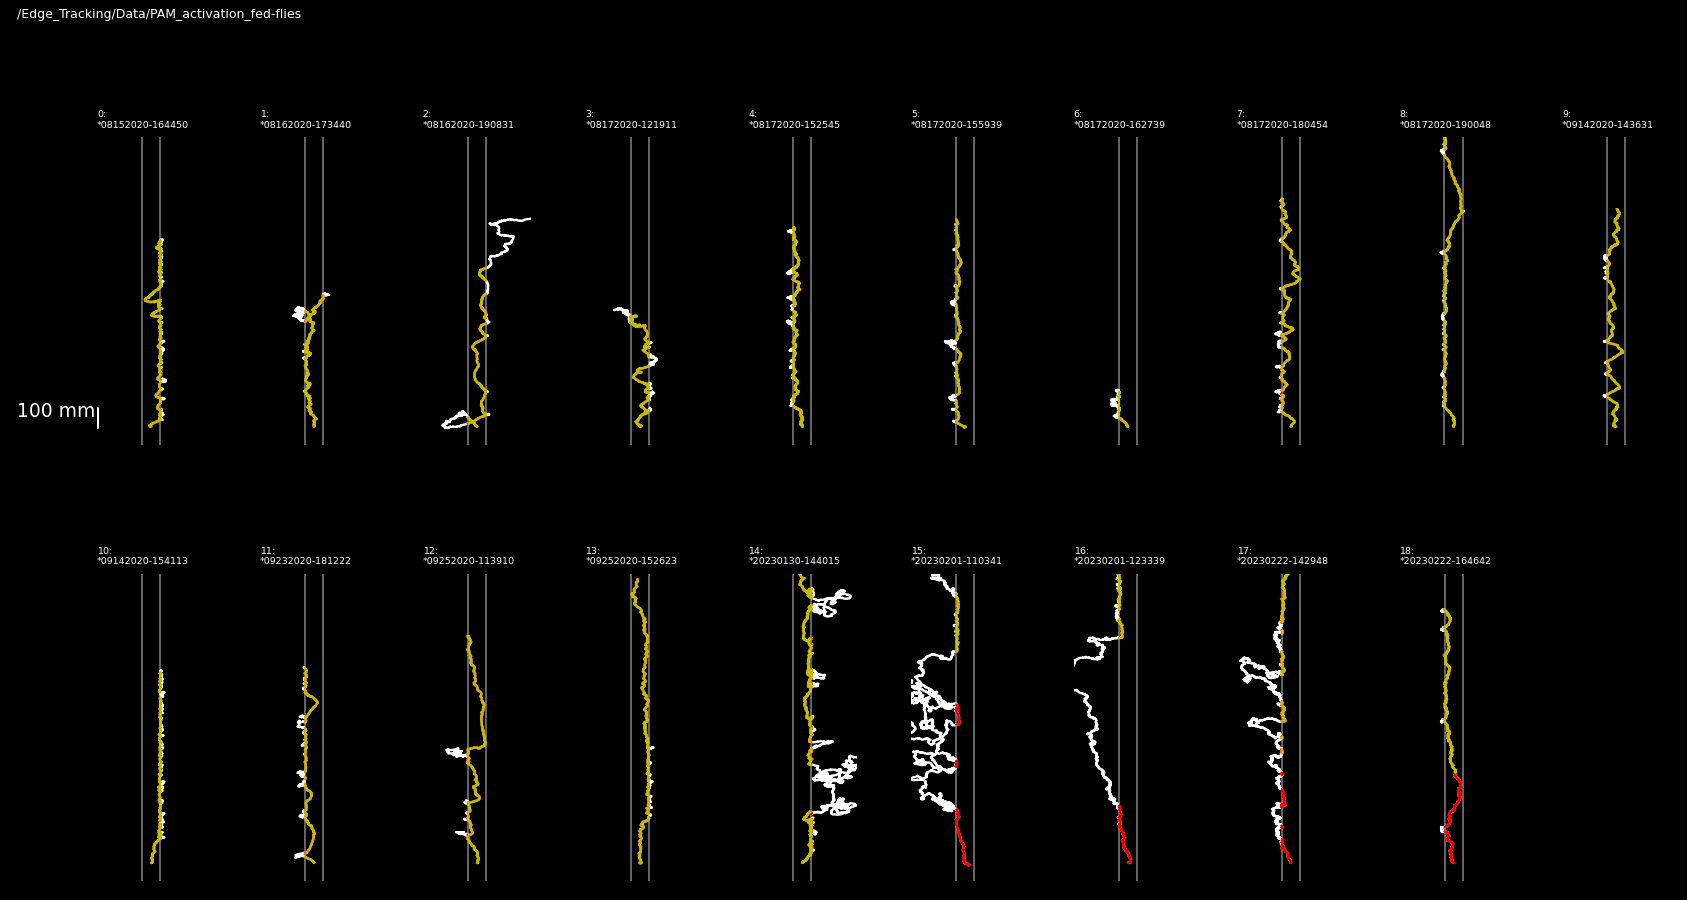

In [333]:
plotdf = etdf[etdf['filename'].isin(incl_files) & (etdf['condition']=='lights')].copy()
nr=2 
nc=10
bool_colors=['r', 'y']
bool_vars = ['instrip', 'led_on']
fig = putil.plot_array_of_trajectories(plotdf, nr=nr, nc=nc, sharey=True,
                            bool_colors=bool_colors, bool_vars=bool_vars, 
                            title='fly_id', notable=incl_files)
util.label_figure(fig, fig_id)
pl.savefig(os.path.join(curr_figdir, 'trajectories-all-reinforced.png'))
pl.savefig(os.path.join(curr_figdir, 'trajectories-all-reinforced.svg'))


# Assign led ON or OFF

In [245]:
# etdf = df_fp.copy().reset_index(drop=True)
# # pre_list = []
# # post_list = []
# #etdf['dist_from_edge'] = etdf['ft_posy'] - 25
# etdf['epoch'] = 'ledoff'
# for fn, df_ in etdf.groupby('filename'):
#     currcond = df_['condition'].unique()[0]
#     fpath = os.path.join(src_dir, 'new', '{}.log'.format(fn)) if fn.startswith('2023') else os.path.join(src_dir, '{}.log'.format(fn))
#     cfg = butil.load_experiment_config(fpath)
#     if cfg is None:
#         y_thresh = 0
#     else:
#         print("found config")
#         y_thresh = cfg['experiment']['y_thresh'] if 'y_thresh' in cfg['experiment'] else 0
#     df_ = putil.zero_trajectory(df_)
#     if currcond == 'no_lights':
#         led_ix = df_.iloc[0].name
#     else:
#         led_ix = df_[df_['led_on']].iloc[0].name
#     #first_led_bout = df_.loc[led_ix]['boutnum']
#     if currcond=='lights':
#         # if y_thresh is 0, even 1st bout will be "ledon":
#         if y_thresh == 0:
#            #df_.loc[ (df_['boutnum']==1), 'epoch'] = 'ledon'
#            df_['epoch'] = 'ledon'
#         else:
#             df_.loc[ (df_['ft_posy']>y_thresh), 'epoch'] = 'ledon'
#     #etdf.loc[(etdf['filename']==fn) & (etdf['ft_posy']>=y_thresh), 'epoch'] = 'post'
#     etdf.loc[df_.index, 'epoch'] = df_['epoch'] #'post'
# etdf['bout_type'] = ['instrip' if i==1 else 'outstrip' for i in etdf['instrip']]
# etdf.loc[etdf['condition']=='no_lights', 'led_on'] = False
# print(etdf['epoch'].unique())

In [246]:
# etdf['epoch'].unique()

# flip trajectories to same side

In [247]:
importlib.reload(butil)
importlib.reload(traj)
importlib.reload(putil)

<module 'plotting' from '/home/julianarhee/Repositories/plume-tracking/plotting.py'>

In [334]:
d_list=[]
for fn, df_ in etdf[etdf['condition']=='lights'].groupby('filename'):
    tmpdf = df_.copy().reset_index(drop=True)
    fly_id = df_['fly_id'].unique()[0]
    # odor boundaries
    odor_bounds = butil.find_strip_borders(tmpdf, 
                                        entry_ix=tmpdf[tmpdf['instrip']].iloc[0].name,
                                        strip_width=strip_width, strip_sep=1000)
    # get et info for PRE period
    tmpdf = df_.copy().reset_index(drop=True)
    led_ix = tmpdf[tmpdf['led_on']].iloc[0].name
    currdf = tmpdf.loc[led_ix:].copy()
    # find all ET bouts (in case there is more than 1)
    et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(currdf,
                                    odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
                                    max_instrip_upwind_percent=max_instrip_upwind_percent, 
                                    max_crossovers=max_crossovers, 
                                    max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
                                    min_outside_bouts=min_outside_bouts,
                                    min_global_upwind_dist=min_global_upwind_dist)
    # flip trajectory so all riding along strip's right side
    # flip WHOLE traj, not just pre LED period
    df_flipped, obounds_fp = butil.check_entryside_and_flip(tmpdf, 
                                            odor_dict=et_bouts, strip_width=strip_width)
    # add NO_LIGHTS condition, too
    df_nolights = etdf[(etdf['fly_id']==fly_id) & (etdf['condition']=='no_lights')].copy()
    # all traj are flipped so that fly hugs strip's RIGHT edge (fly's left side)
    # zero no-lights traj, and use coarse measure (are most points neg or pos)
    if df_nolights.shape[0]==0:
        d_list.append(df_flipped)
        continue
    df_nolights_zero = putil.zero_trajectory(df_nolights)
    df_nolights['flipped'] = False
    if df_nolights_zero['ft_posx'].median() < 0: # flip
        df_nolights = butil.fliplr_dataframe(df_nolights)
        df_nolights['flipped'] = True
    d_list.append(df_flipped)
    d_list.append(df_nolights)
df_fp = pd.concat(d_list)

Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True


#### check flipped

In [335]:
df_fp[df_fp['condition']=='lights']['filename'].nunique()

19

<IPython.core.display.Javascript object>


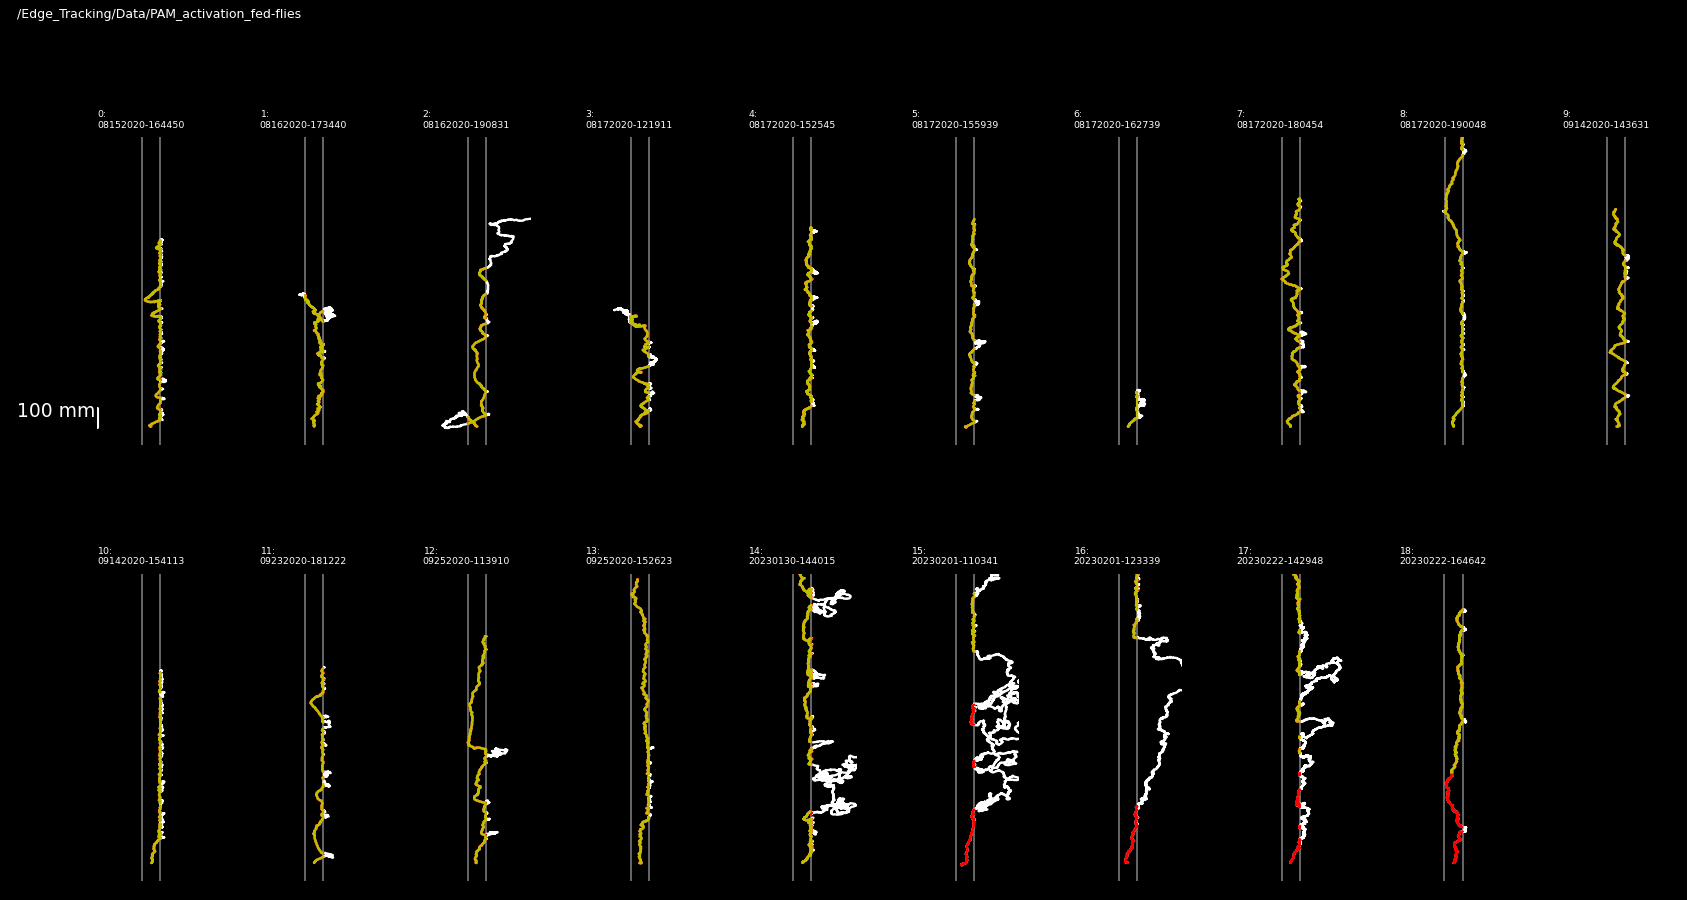

In [336]:
# plot flipped trajectories to check
bool_colors=['r', 'y']
bool_vars = ['instrip', 'led_on']
fig = putil.plot_array_of_trajectories(df_fp[df_fp['condition']=='lights'], nr=nr, nc=nc, 
                                bool_colors=bool_colors, bool_vars=bool_vars, title='fly_id')
util.label_figure(fig, fig_id)
pl.savefig(os.path.join(curr_figdir, 'trajectories_fp.png'))
pl.savefig(os.path.join(curr_figdir, 'trajectories_fp.svg'))

## zero trajectory

In [337]:
etdf = df_fp.copy()
df_z = [putil.zero_trajectory(df_) for fn, df_ in etdf.groupby('filename')]
etdf_zero = pd.concat(df_z).reset_index(drop=True)

# includd dist_from_edge
etdf_zero['dist_from_edge'] = etdf_zero['ft_posx'] - 25
etdf_zero['dist_from_edge_abs'] = abs(etdf_zero['dist_from_edge'])
etdf_zero.loc[etdf_zero['instrip'], 'dist_from_edge_abs'] = (25 - etdf_zero.loc[etdf_zero['instrip'], 'ft_posx']) 
# abs( etdf_multi_zero['ft_posx'] ) - 25

In [370]:
etdf_zero['condition'].unique()

array(['no_lights', 'lights'], dtype=object)

In [ ]:
df

<IPython.core.display.Javascript object>


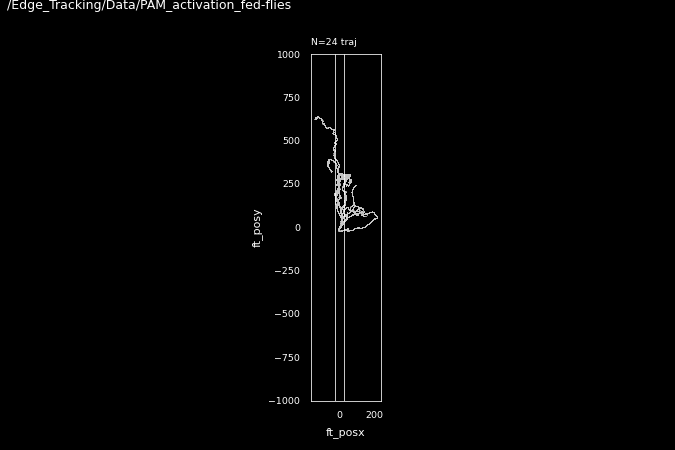

1
8
9
14
15
22


In [423]:

#tmpdf = etdf_zero[etdf_zero['condition']=='no_lights']
tmpdf = df0[df0['condition']=='no_lights']

sorted_by_ypos = tmpdf.groupby('filename', as_index=False)['ft_posy'].max()\
                        .sort_values(by='ft_posy', ascending=False)
fns = sorted_by_ypos['filename'].values[2:20][0::3]

fig, ax= pl.subplots()
for i, (fn, df_) in enumerate(tmpdf.groupby('filename')):
    if fn in fns: #i%5==0:
        print(i)
        sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', s=0.2, color=[0.7]*3)
ax.set_aspect(1)
ax.axvline(x=-25, color='w', lw=0.5)
ax.axvline(x=25, color='w', lw=0.5)
ax.set_ylim([-1000, 1000])
ax.set_title("N={} traj".format(tmpdf['filename'].nunique()), fontsize=6, loc='left')
util.label_figure(fig, fig_id)
pl.savefig(os.path.join(curr_figdir, 'example_fed_flies_subset2.svg'))


In [422]:
 sorted_by_ypos['ft_posy'].values[2:20][0::3]

array([640.73132307, 396.07760966, 315.656314  , 297.79241131,
       243.96267298, 127.96306002])

# plot final

In [338]:
curr_figdir = os.path.join(figdir, 'ets')
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print(curr_figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets


In [339]:
led_palette = {'ledon': 'green', 'ledoff': [0.7]*3}
bool_colors=['r', 'y']
bool_vars = ['instrip', 'led_on']

In [340]:
'epoch' in etdf_zero.columns

True

<IPython.core.display.Javascript object>


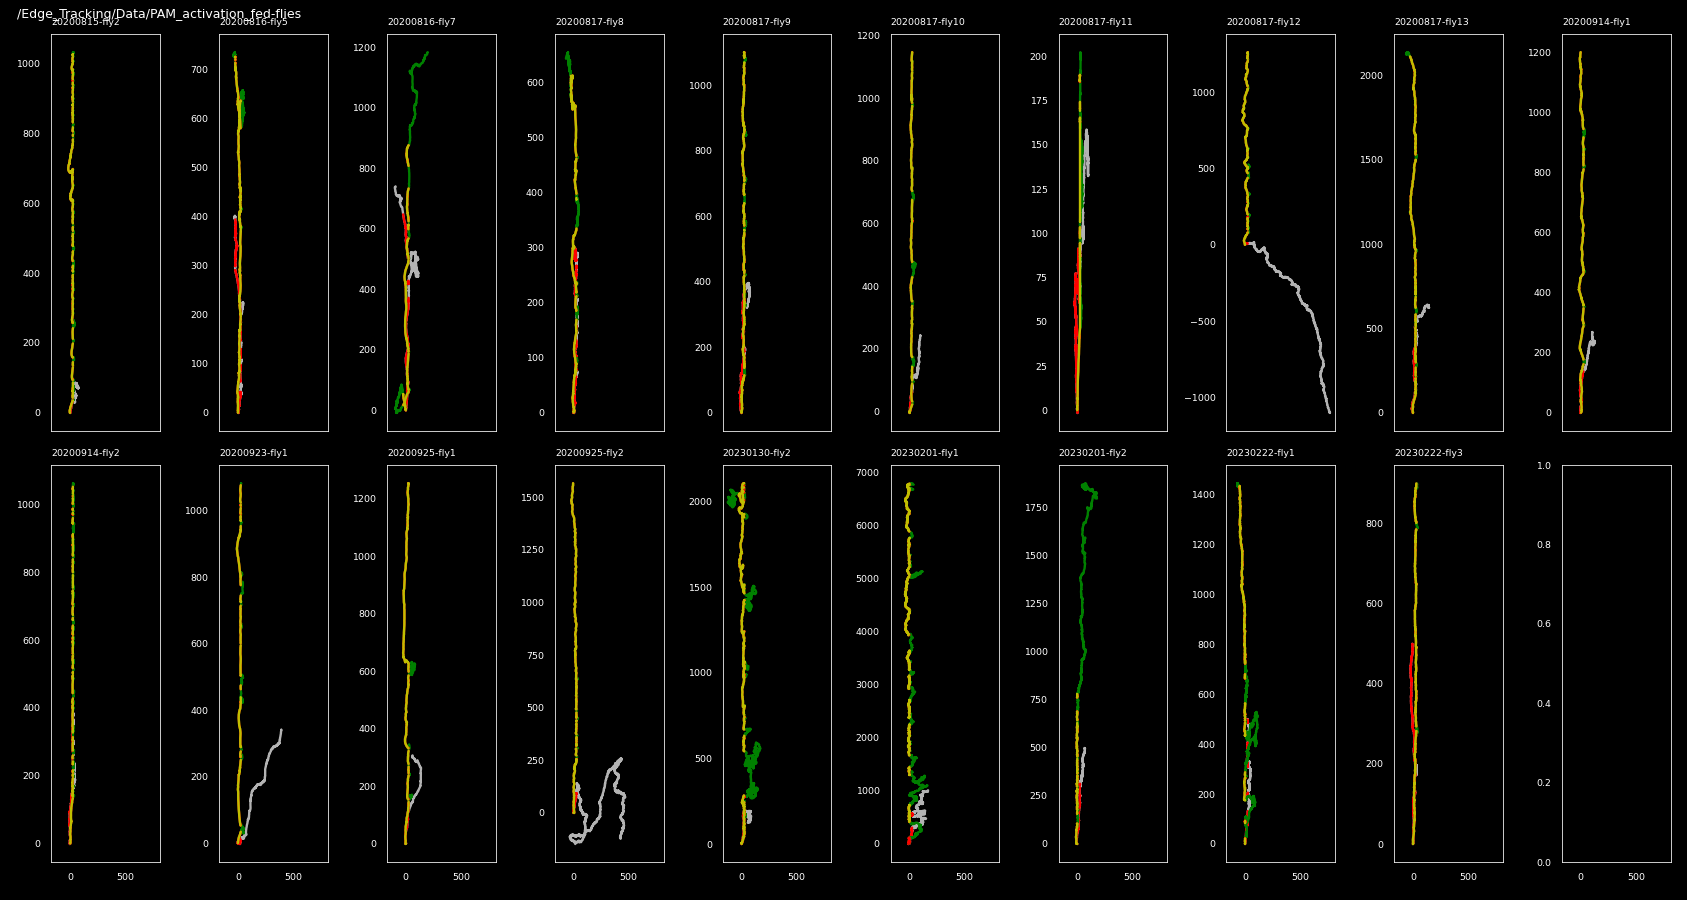

In [341]:
plot_all=True
if plot_all:
    # fig = putil.plot_array_of_trajectories(etdf1, nr=nr, nc=nc, bool_colors=bool_colors, bool_vars=bool_vars, title='fly_id')
    nr=2
    nc=10
    fig, axn = pl.subplots(nr, nc, figsize=(15, 8), sharex=True)
    fly_ids = sorted(etdf_zero['fly_id'].unique(), key=util.natsort)
    for (fly_id, epoch), df_ in etdf_zero.groupby(['fly_id', 'epoch']):
        ai = fly_ids.index(fly_id)
        ax=axn.flat[ai]
        putil.plot_zeroed_trajectory(df_, ax=ax, traj_lw=1.5, odor_lw=1.0,
                                    strip_width=strip_width, strip_sep=1000, 
                                    plot_odor_strip=epoch=='lights',
                                    main_col=led_palette[epoch],
                                    bool_colors=bool_colors, bool_vars=bool_vars)
        ax.set_title(fly_id, loc='left', fontsize=6)
    pl.tight_layout()
    util.label_figure(fig, fig_id)
    pl.savefig(os.path.join(curr_figdir, 'trajectories_final.png'))
    pl.savefig(os.path.join(curr_figdir, 'trajectories_final.svg'))

# Average bout

In [342]:
xvar='ft_posx'
yvar='ft_posy'

ledoff_color = 'w'
ledon_color='g'

epoch_palette = {'ledon': 'm', 'ledoff': [0.7]*3}
lw=0.15
avg_lw=1

### avg bout -- all in 1

In [343]:
curr_figdir = os.path.join(figdir, 'ets')
fly_ids = sorted(etdf_zero['fly_id'].unique(), key=util.natsort)
len(fly_ids)

19

<IPython.core.display.Javascript object>


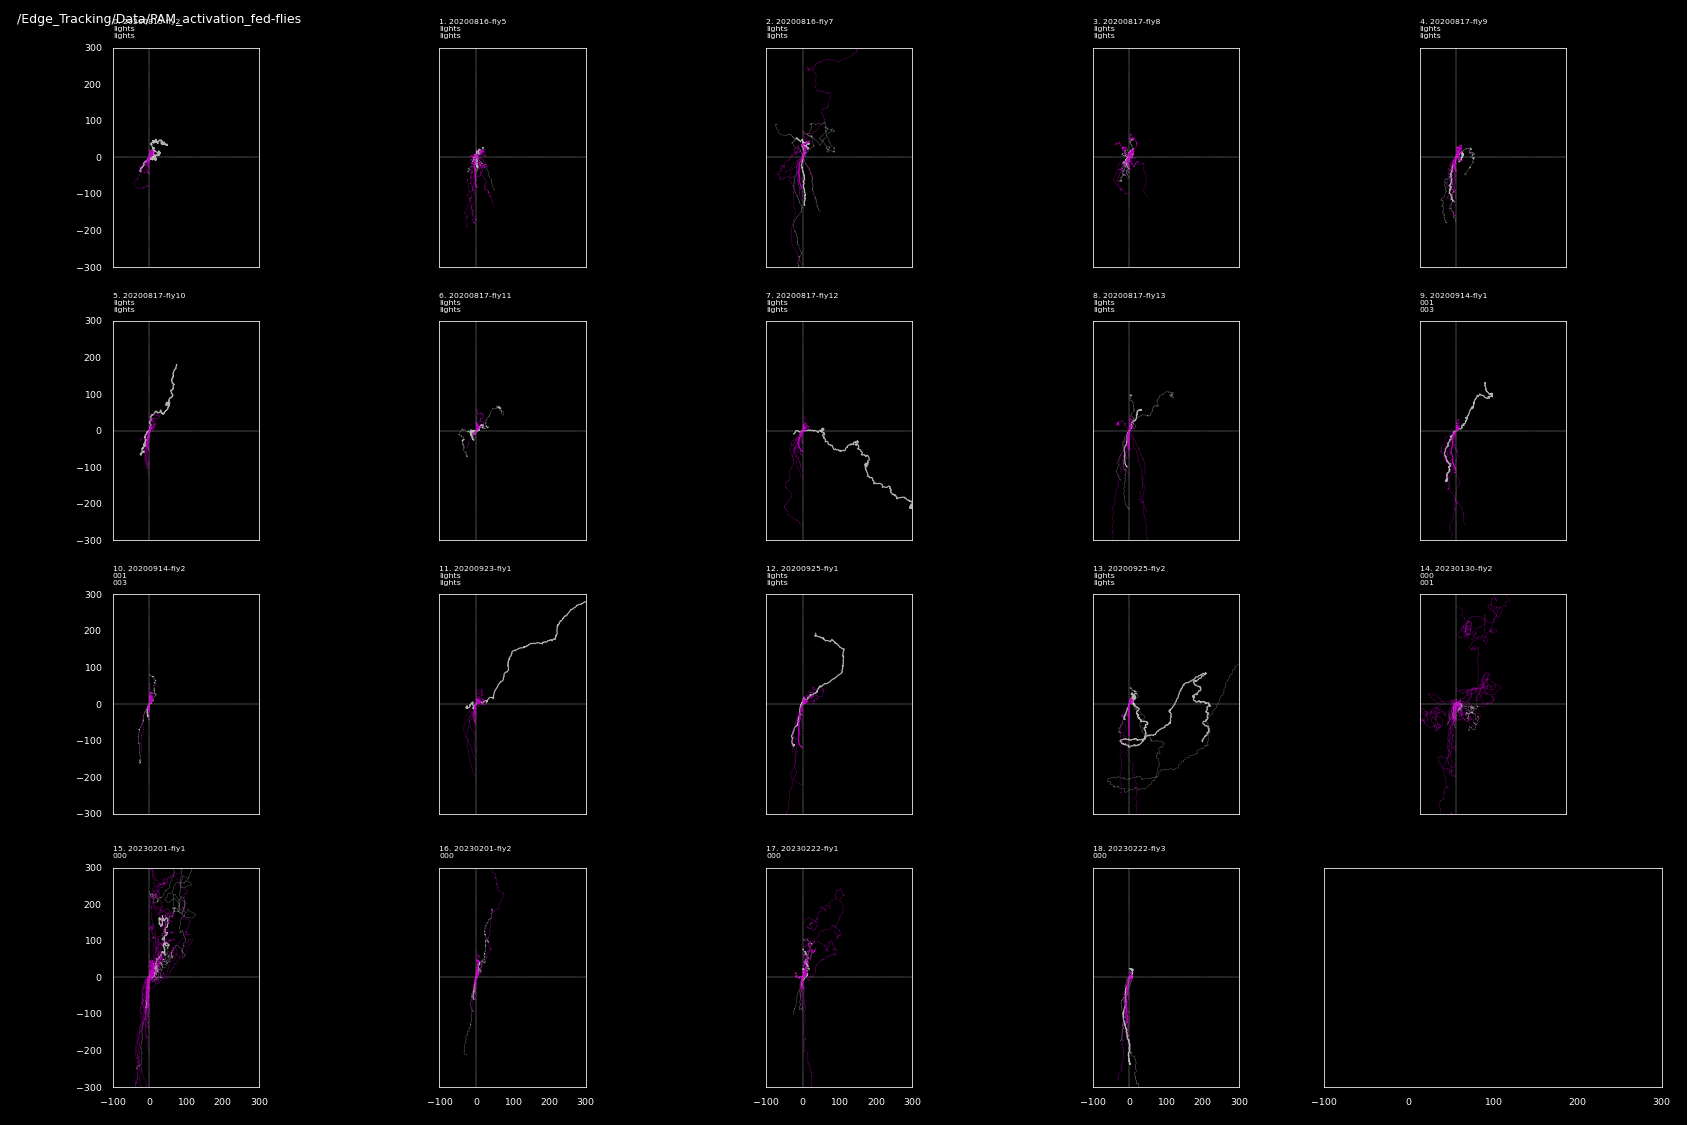

In [344]:
plot_all = True
# --------------------------------------------------------
lw=0.15
avg_lw=0.76
nr=4
nc=5
max_nframes = etdf_zero.groupby(['filename', 'instrip', 'boutnum'])['ft_frame'].nunique().max()

if plot_all:

    fig, axn = pl.subplots( nr, nc, sharex=True, sharey=True, figsize=(15, 10)) #, dpi=300) # figsize=(8,8))
    for fi, (fn, trialdf) in enumerate(etdf_zero.groupby('filename')):
        fly_id = trialdf['fly_id'].unique()[0]
        epochs = ['ledoff', 'ledon']
        ai = fly_ids.index(fly_id)
        ax=axn.flat[ai]
        for epoch, epoch_df in trialdf.groupby('epoch'):
            # limit bouts
            first_bout = epoch_df[epoch_df['instrip']]['boutnum'].min() # start at first in bout (since mid trajectory)
            last_bout = epoch_df['boutnum'].max() #- 1# # 

            # dropnas
            drop_cols = epoch_df.columns[epoch_df.isna().any()].tolist()
            incl_cols = [c for c in epoch_df.columns if c not in drop_cols]
            df_ = epoch_df[(epoch_df['boutnum']>=first_bout) & (epoch_df['boutnum']<=last_bout)][incl_cols].copy()
            # interpolate and align
            interp_x_in, interp_y_in, avg_x_in, avg_y_in = traj.align_and_average_bout_center0(df_[df_['instrip']], end_at_zero=True)
            interp_x_out, interp_y_out, avg_x_out, avg_y_out = traj.align_and_average_bout_center0(df_[~df_['instrip']], end_at_zero=False)                                                                                 
            # plot each
            ax.plot(interp_x_in, interp_y_in, lw=lw, color=epoch_palette[epoch])
            ax.plot(interp_x_out, interp_y_out, lw=lw, color=epoch_palette[epoch])
            # plot avg
            ax.plot(avg_x_in, avg_y_in, lw=avg_lw, color=epoch_palette[epoch])
            ax.plot(avg_x_out, avg_y_out, lw=avg_lw, color=epoch_palette[epoch])
            # plot 0,0
            ax.axhline(y=0, linestyle=':', color='w', lw=0.25)
            ax.axvline(x=0, linestyle=':', color='w', lw=0.25)
            #ax.set_aspect(1)
            ax.set_aspect(1)
            ax.set_ylim([-300, 300])
            ax.set_xlim([-100, 300])
            ax.set_aspect(1)
        fns = etdf_zero[etdf_zero['fly_id']==fly_id]['filename'].unique()
        fn_str = '\n'.join([f.split('_')[-1] for f in fns])
        ax.set_title('{}. {}\n{}'.format(ai, fly_id, fn_str), loc='left', fontsize=5)

    for i in np.arange(fi+1, nr*nc):
        axn.flat[i].axis('off')
    util.label_figure(fig, fig_id)
    pl.tight_layout()
    pl.savefig(os.path.join(curr_figdir, 'avgbouts.png'), dpi=300) #_{}.png'.format(fn)))
    pl.savefig(os.path.join(curr_figdir, 'avgbouts.svg')) #_{}.png'.format(fn)))

## avg across flies

In [345]:
d_list = []
#min_bouts_to_average=3
max_nframes = etdf_zero.groupby(['filename', 'instrip', 'boutnum'])['ft_frame'].nunique().max()
for fn, trialdf in etdf_zero.groupby('filename'):
    fly_id = trialdf['fly_id'].unique()[0]
    epochs = ['ledoff', 'ledon']
    for epoch, epoch_df in trialdf.groupby('epoch'):
        ai = epochs.index(epoch)
        first_bout = epoch_df[epoch_df['instrip']]['boutnum'].min() # start at first in bout (since mid trajectory)
        last_bout = epoch_df['boutnum'].max() #- 1# # 
        drop_cols = epoch_df.columns[epoch_df.isna().any()].tolist()
        incl_cols = [c for c in epoch_df.columns if c not in drop_cols]
        df_ = epoch_df[(epoch_df['boutnum']>=first_bout) & (epoch_df['boutnum']<=last_bout)][incl_cols].copy()
        # interpolate and align
        for is_instrip, tmpdf in df_.groupby('instrip'):
            interp_x_in, interp_y_in, avg_x_in, avg_y_in = traj.align_and_average_bout_center0(tmpdf, end_at_zero=is_instrip)
            avg_ = pd.DataFrame({
                'avg_x': avg_x_in, 
                'avg_y': avg_y_in,
                'filename': fn,
                'fly_id': fly_id,
                'epoch': epoch,
                'instrip': is_instrip
            })
            d_list.append(avg_)
avgdf = pd.concat(d_list)

In [346]:
n_traj = len(avgdf['filename'].unique())
n_flies = len(avgdf['fly_id'].unique())
print(n_traj, n_flies)

34 19


In [347]:
epoch_palette= {'ledon': 'magenta', 'ledoff': [0.7]*3}

<IPython.core.display.Javascript object>


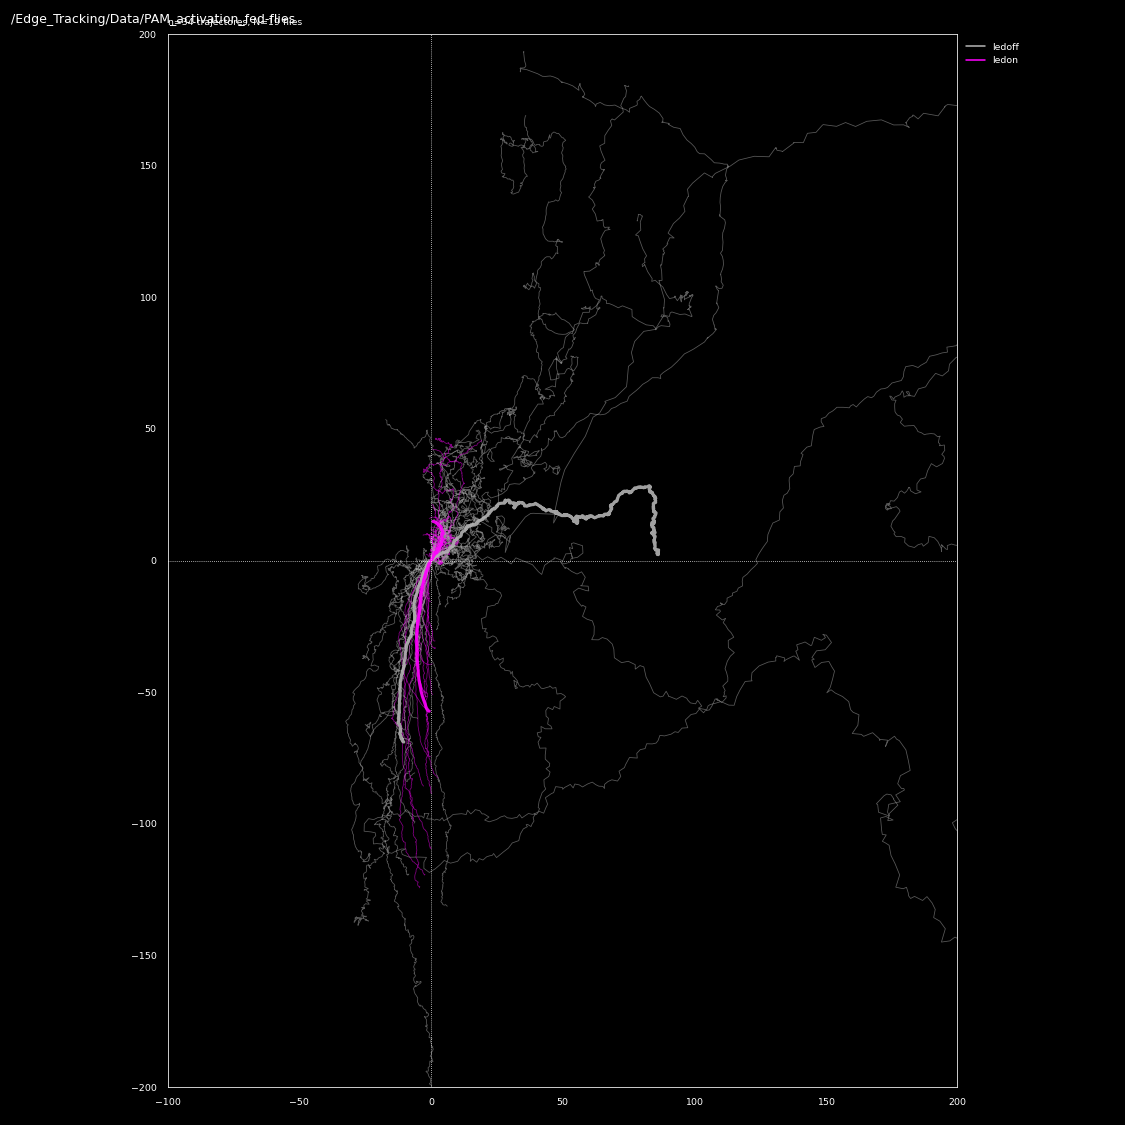

In [348]:
#avgdf = pd.concat(d_list)
lw=0.5
avg_lw=2
# excl = ['11122021-151822_PAMGtACR1_Fly1_001']
excl=[]
plotdf = avgdf[~avgdf['filename'].isin(excl)].copy()

plotdf['index'] = plotdf.index.tolist()
plotdf.groupby('index')['avg_x'].mean()

fig, ax = pl.subplots(figsize=(10,10))
for (fn, epoch, instrip), epochdf in plotdf.groupby(['filename', 'epoch', 'instrip']):
    ax.plot(epochdf['avg_x'], epochdf['avg_y'], color=epoch_palette[epoch], lw=lw, alpha=0.5)
plotdf['index'] = plotdf.index.tolist()

for (epoch, instrip), plotdf_ in plotdf.groupby(['epoch', 'instrip']):
    x_ = plotdf_.groupby('index')['avg_x'].mean()
    y_ = plotdf_.groupby('index')['avg_y'].mean()
    ax.plot(x_, y_, lw=avg_lw, color=epoch_palette[epoch], alpha=0.9)
ax.set_title("n={} trajectores, N={} flies".format(n_traj, n_flies), loc='left', fontsize=6)

ax.axhline(y=0, linestyle=':', color='w', lw=0.5)
ax.axvline(x=0, linestyle=':', color='w', lw=0.5)
ax.set_aspect(1)
ax.set_ylim([-200, 200])
ax.set_xlim([-100, 200])

labels = ['ledoff', 'ledon']
colors = [epoch_palette[i] for i in labels]
legh = putil.custom_legend(labels, colors, use_line=True, lw=1)
ax.legend(handles=legh, bbox_to_anchor=(1,1), loc='upper left', frameon=False)

util.label_figure(fig, fig_id)
pl.tight_layout()
pl.savefig(os.path.join(curr_figdir, 'avgbout-avgfly.png'), dpi=300) #_{}.png'.format(fn)))
pl.savefig(os.path.join(curr_figdir, 'avgbout-avgfly.svg'), dpi=300) #_{}.png'.format(fn)))

# Average bout metrics

In [349]:
yvarnames = ['duration', 'speed','path_length', 
            'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 
            'upwind_speed', 'upwind_dist_range', 
            'max_dist_from_edge_abs', 'max_dist_from_edge', 'average_ft_heading']

In [350]:
# boutdf = pd.concat([butil.calculate_bout_metrics(df_) \
#                 for (fi, fn, bn, cond), df_ in \
#                 etdf.groupby(['fly_id', 'filename', 'boutnum', 'condition']), axis=1).T
# boutdf['boutnum']

importlib.reload(butil)

# group_vars = ['fly_id', 'filename', 'boutnum', 'condition']
# boutdf = etdf_zero.groupby(group_vars, as_index=False)\
#                   .apply(butil.calculate_bout_metrics, group_vars=group_vars).unstack()
#numeric = etdf_zero.select_dtypes(include=np.number).columns.tolist()
boutdf = butil.get_bout_metrics(etdf_zero) #,numeric=numeric)
# # boutdf_filt = traj.filter_first_instrip_last_outstrip(boutdf)
boutdf_filt = boutdf.copy()

In [351]:
# mean_boutdf = boutdf_filt.groupby(\
#                 ['fly_id', 'instrip', 'condition', 'bout_type', 'epoch'], \
#                 as_index=False).mean()#.reset_index()
# # mean_boutdf['bout_type'] = ['instrip' if i==1 else 'outstrip' for i in mean_boutdf['instrip']]
# mean_boutdf['instrip'] = mean_boutdf['instrip'].astype(bool)
# mean_boutdf['led_on'] = mean_boutdf['led_on'].astype(bool)
# print(mean_boutdf.shape)
# mean_boutdf.columns

estimator='median'
# -----------------------
if estimator=='max':
    metrics = boutdf_filt.groupby(['fly_id', 'condition', 'block', 'epoch', 'instrip'], as_index=False).max()
elif estimator == 'mean':
    metrics = boutdf_filt.groupby(['fly_id', 'condition',  'block', 'epoch', 'instrip'], as_index=False).mean()
else: #estimator should be median
    metrics = boutdf_filt.groupby(['fly_id', 'condition', 'block', 'epoch', 'instrip'], as_index=False).median()
metrics['bout_type'] = ['instrip' if v==True else 'outstrip' for v in metrics['instrip']]
metrics['epoch_type'] = ['{}-{}'.format(a, b) for a, b in metrics[['bout_type', 'epoch']].values]
# Add max pos
# maxy = etdf_zero.groupby(['fly_id', 'filename', 'epoch', 'instrip', 'condition'], \
#                   as_index=False).apply(lambda x: x['ft_posy'].max() - x['ft_posy'].min()).rename(columns={None: 'ft_posy_max'})
# print(maxy.shape, boutdf.shape)
# metrics = pd.merge(metrics, maxy, on=['fly_id', 'filename', 'instrip', 'condition'] )

max_y_in_block = etdf_zero.groupby(['fly_id', 'epoch', 'block', 'instrip'], \
                  as_index=False).apply(lambda x: x['ft_posy'].max() - x['ft_posy'].min()).rename(columns={None: 'ft_posy_max'})
for (fn, ep, bk, ins), df_ in max_y_in_block.groupby(['fly_id', 'epoch', 'block', 'instrip']):
    metrics.loc[(metrics['fly_id']==fn) 
                & (metrics['block']==bk)
                & (metrics['epoch']==ep)
                & (metrics['instrip']==ins), 'ft_posy_max'] = float(df_['ft_posy_max'])
# metrics.pop('boutnum')
#metrics.pop('ft_posy')
metrics['bout_type'] = ['instrip' if v==True else 'outstrip' for v in metrics['instrip'].values]
print(metrics.shape, metrics.dropna().shape)


/tmp/ipykernel_57806/299923028.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metrics = boutdf_filt.groupby(['fly_id', 'condition', 'block', 'epoch', 'instrip'], as_index=False).median()


(76, 49) (8, 49)


In [352]:
metrics.groupby(['epoch', 'instrip']).count()

fly_id  condition  block  average_ft_heading  boutnum  \
epoch  instrip                                                          
ledoff False        19         19     19                  19       19   
       True         19         19     19                  19       19   
ledon  False        19         19     19                  19       19   
       True         19         19     19                  19       19   

                crosswind_dist  crosswind_dist_firstlast  \
epoch  instrip                                             
ledoff False                19                        19   
       True                 19                        19   
ledon  False                19                        19   
       True                 19                        19   

                crosswind_dist_range  crosswind_speed  cum_time  ...  \
epoch  instrip                                                   ...   
ledoff False                      19               19        19  ...   
       True                       19               19        19  ...   
ledon  False                      19               19        19  ...   
       True                       19               19        19  ...   

                sig_status  speed  time  upwind_dist  upwind_dist_firstlast  \
epoch  instrip                                                                
ledoff False             5     19    19           19                     19   
       True              5     19    19           19                     19   
ledon  False             5     19    19           19                     19   
       True              5     19    19           19                     19   

                upwind_dist_range  upwind_speed  bout_type  epoch_type  \
epoch  instrip                                                           
ledoff False                   19            19         19          19   
       True                    19            19         19          19   
ledon  False                   19            19         19          19   
       True                    19            19         19          19   

                ft_posy_max  
epoch  instrip               
ledoff False             19  
       True              19  
ledon  False             19  
       True              19  

[4 rows x 47 columns]

In [353]:
# epoch_counts = mean_boutdf.groupby('fly_id', as_index=False)['epoch'].count() #.reset_index()
# # should b 4 conds: 2 epochs, 2 instrip/outstrip
# excluded_files = epoch_counts[epoch_counts['epoch']<4]['fly_id'].values
# mean_boutdf = mean_boutdf[~mean_boutdf['fly_id'].isin(excluded_files)]
# mean_boutdf.shape, excluded_files

epoch_counts = metrics.groupby('fly_id')['epoch'].count().reset_index()
excluded_files = epoch_counts[epoch_counts['epoch']!=4]['fly_id'].values
print(excluded_files)
metrics = metrics[~metrics['fly_id'].isin(excluded_files)]

[]


# paired summary metrics

In [354]:
yvarnames = ['duration', 'speed','path_length', 
            'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 
            'upwind_speed', 'upwind_dist_range', 
            'max_dist_from_edge_abs', 'max_dist_from_edge', 'average_ft_heading', 'ft_posy_max']
len(yvarnames)

13

In [355]:
# mean_oneper = metrics.groupby(['fly_id', 'epoch', 'instrip', 'bout_type'], as_index=False).mean()

In [361]:
curr_plotvars = ['duration', 'speed', 'crosswind_dist_range', 'path_length_x',
                 'max_dist_from_edge_abs', 'upwind_speed', 'crosswind_speed', 'ft_posy_max']
len(curr_plotvars)

8

In [362]:
pl.rcParams['svg.fonttype'] = 'none'

/tmp/ipykernel_57806/3474096026.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_oneper = metrics.groupby(['fly_id', 'epoch', 'instrip', 'bout_type', 'epoch_type'], as_index=False).median()


<IPython.core.display.Javascript object>


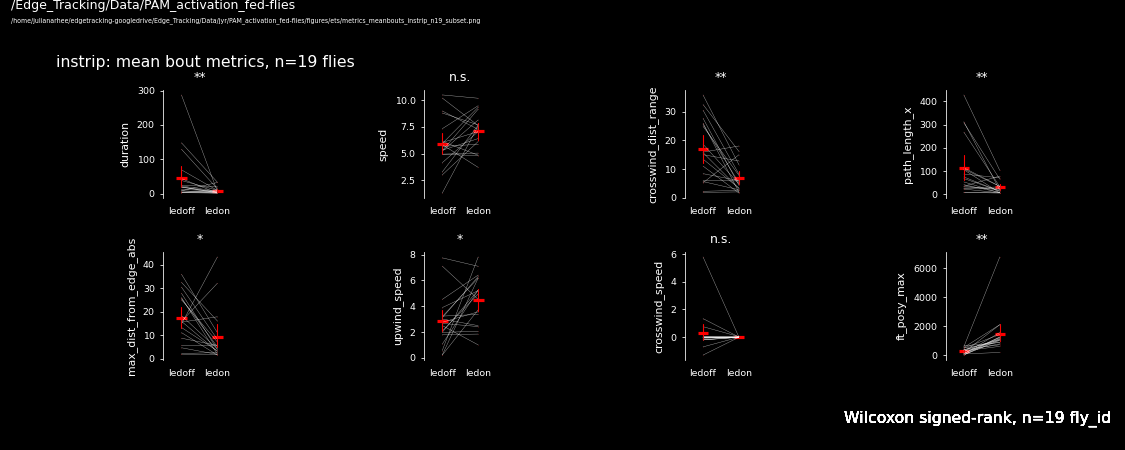

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.0, 0.0), (1.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/julianarhee/Repositories/plume-tracking/plotting.py:197: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oneval_per= df_.groupby([pair_by, xvarname], as_index=False).mean()
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.0, 0.0), (1.0, 0.0, 0.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may c

metrics_meanbouts_instrip_n19_subset


<IPython.core.display.Javascript object>


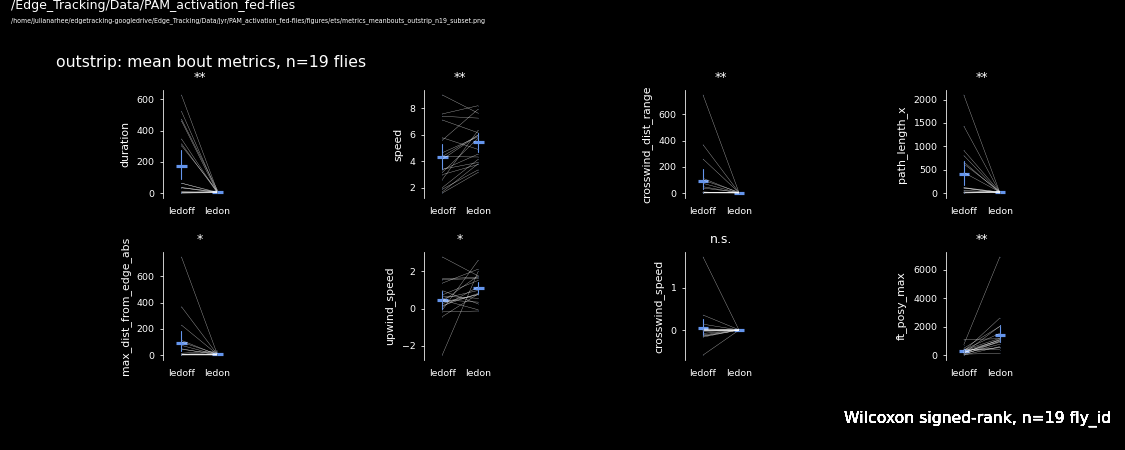

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.39215686274509803, 0.5843137254901961, 0.9294117647058824), (0.39215686274509803, 0.5843137254901961, 0.9294117647058824)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/julianarhee/Repositories/plume-tracking/plotting.py:197: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oneval_per= df_.groupby([pair_by, xvarname], as_index=False).mean()
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.39215686274509803, 0.5843137254901961, 0.92941176470588

metrics_meanbouts_outstrip_n19_subset


In [363]:
nr=2
nc=4
mean_oneper = metrics.groupby(['fly_id', 'epoch', 'instrip', 'bout_type', 'epoch_type'], as_index=False).median()

conds = ['instrip', 'outstrip']
dfs = [mean_oneper[mean_oneper['instrip']], mean_oneper[~mean_oneper['instrip']]]
fly_ids = mean_oneper['fly_id'].unique()

for currcond, df_ in zip(conds, dfs):
    fig = putil.plot_paired_inout_metrics(df_, pair_by='fly_id', 
                xvarname='epoch', yvarnames=curr_plotvars, nr=nr, nc=nc,
                xticklabels=['ledoff', 'ledon'], order=['ledoff', 'ledon'],
                color=instrip_palette2[currcond], aspect=1.5,
                line_markersize=0.3, lw=0.25, alpha=0.7, plot_mean=True, errwidth=0.7)
    fig.text(0.05, 0.85, '{}: mean bout metrics, n={} flies'.format(currcond, len(fly_ids)), fontsize=10)
    pl.subplots_adjust(top=0.8)
    util.label_figure(fig, fig_id)
    
    figname = 'metrics_meanbouts_{}_n{}_subset'.format(currcond, len(fly_ids))
    fig.text(0.01, 0.95, os.path.join(curr_figdir, '{}.png'.format(figname)), fontsize=4)

    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(figname)))
    pl.savefig(os.path.join(curr_figdir, '{}.svg'.format(figname)))
    print(figname)

# plot all 4 conds at once

In [364]:
yvarnames = ['duration', 'speed','path_length', 
            'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 
            'upwind_speed', 'upwind_dist_range', 
            'max_dist_from_edge_abs', 'max_dist_from_edge', 'average_ft_heading', 'ft_posy_max']
print(len(yvarnames))

13


In [365]:
# metrics_oneper = metrics.groupby(['fly_id', 'filename', 'epoch', 'instrip', 'bout_type', 'epoch_type'], as_index=False).mean()
# Merge for easier plotting
meltdf_metrics = pd.melt(mean_oneper, id_vars=['fly_id', 'bout_type', 'epoch', 'epoch_type'],
               value_vars=yvarnames, value_name='value')
meltdf_metrics['value'] = meltdf_metrics['value'].astype(float)

In [366]:
curr_figdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets'

In [367]:
#curr_plotvars = yvarnames
curr_plotvars = ['duration', 'speed', 'crosswind_dist_range', 'path_length_x',
                 'max_dist_from_edge_abs', 'upwind_speed', 'crosswind_speed', 'ft_posy_max']
print(len(curr_plotvars))
plotdf = meltdf_metrics[meltdf_metrics['variable'].isin(curr_plotvars)].copy()

8


<IPython.core.display.Javascript object>


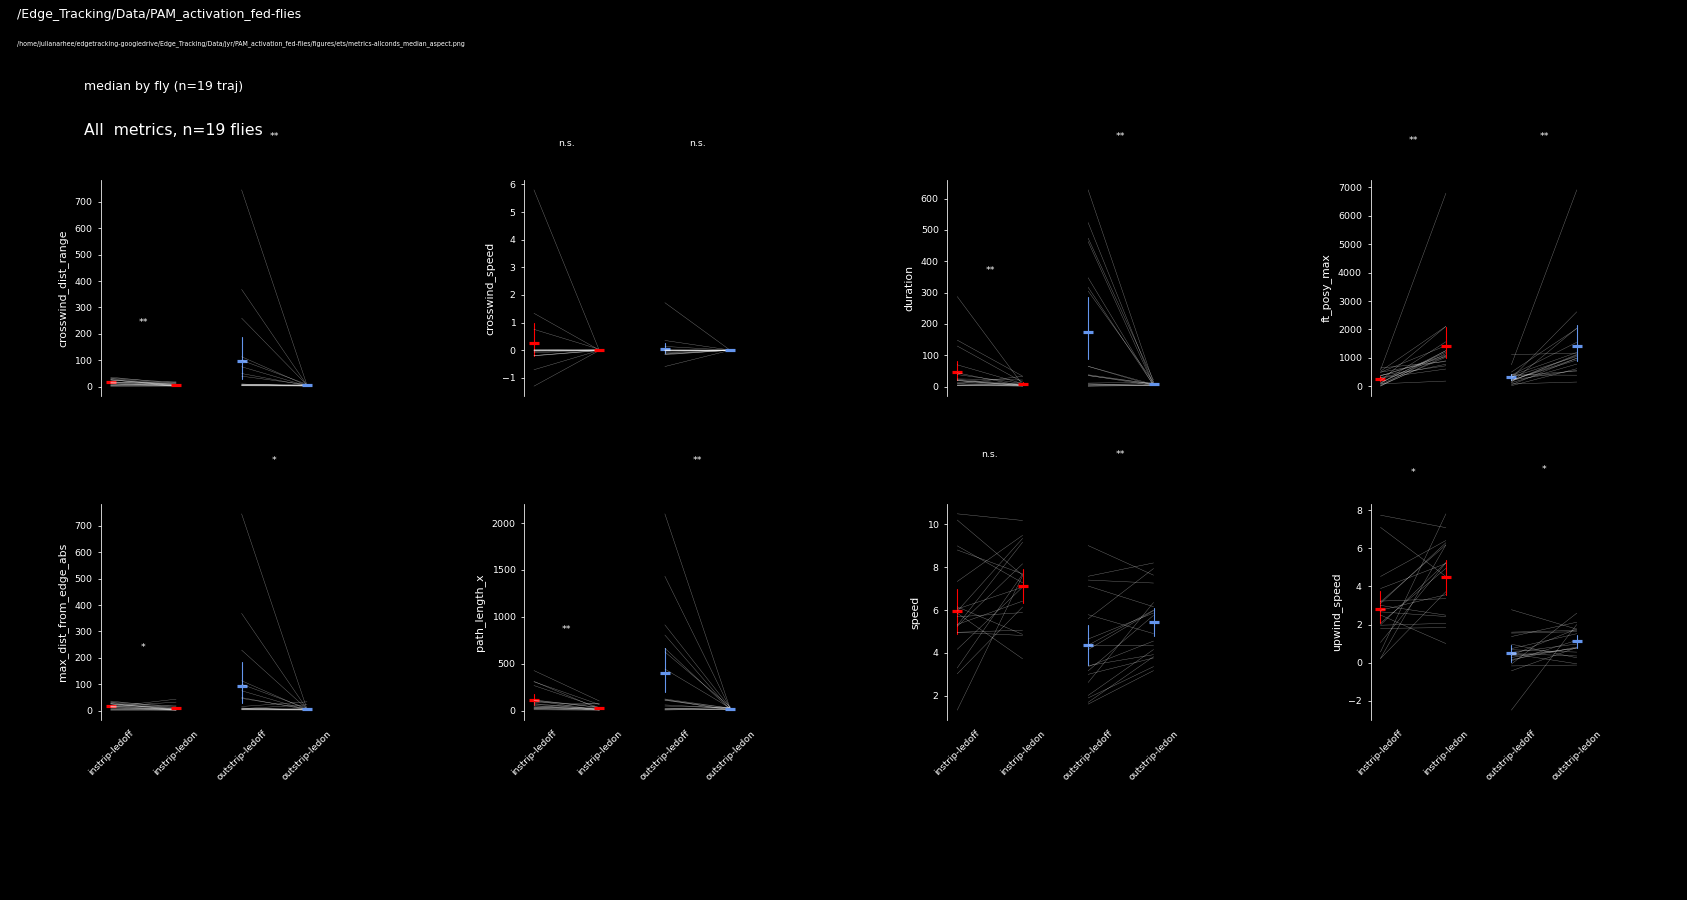

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of t

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets/metrics-allconds_median_aspect.svg


In [369]:
# plot all paird metrics
crossfly_estimator='mean'

xorder = ['instrip-ledoff', 'instrip-ledon', 'outstrip-ledoff', 'outstrip-ledon']
epochtypes_palette = dict((k, instrip_palette2['instrip']) if 'instrip' in k else (k, instrip_palette2['outstrip']) for k in xorder)
n_fns = plotdf['fly_id'].nunique()

nr=2
nc=4
lw=0.25
alpha=0.5
fig, axn = pl.subplots(nr, nc, figsize=(15, 8))
# plot bout metrics
ci = 0; ri = 0;
for cond, cond_df in plotdf.groupby('variable'):
    if ci >= nc:
        ci = 0; ri = 1;
    ax=axn[ri, ci]
    sns.pointplot(data=cond_df, x='epoch_type', y='value', hue='epoch_type', order=xorder, ax=ax, 
                  markers='_',  scale=1, errwidth=0.7, join=False, palette=epochtypes_palette,
                  estimator=crossfly_estimator) #, jitter=False)
#     sns.stripplot(data=cond_df, x='epoch_type', y ='value', order=xorder, c='w',
#                   #hue='epoch_type', hue_order=xorder, palette=epochtypes_palette,
#                   ax=ax, s=0.3, alpha=0.7, jitter=True, legend=0)

    ci+=1
    ax.set_ylabel(cond)
    # stats
    for bi, bout in enumerate(['instrip', 'outstrip']):
        a = cond_df[cond_df['epoch_type']=='{}-ledoff'.format(bout)]['value'].values
        b = cond_df[cond_df['epoch_type']=='{}-ledon'.format(bout)]['value'].values
        xs = np.array([ [0]*len(a), [1]*len(a) ]) + (bi*2)
        ys = np.array([a, b])
        ax.plot(xs, ys, c='w', alpha=alpha, lw=lw)
        # stats: wilcoxon signed-rank test (nonparametric paired t)
        pdf = pd.DataFrame({'a': a, 'b': b})
        T, pv = spstats.wilcoxon(pdf["a"], pdf["b"], nan_policy='omit')
        if pv>=0.05:
            annot = 'n.s.'
        else:
            annot = '**' if pv<0.01 else '*'
#         ks = st.ks_2samp(a, b)
#         stat_string = 'ks: {:.2f}, p: {:.2f}'.format(ks['ks_stat'], ks['p_value'])
#         if ks['p_value']<0.05:
#             annot = '**' if ks['p_value']<0.01 else '*'
#         else:
#             annot='n.s.'
        ax.text(bi*2 + 0.5, ax.get_ylim()[-1]*1.2, annot, fontsize=6, ha='center')
    # axes
    putil.set_outward_spines(ax)
    putil.remove_spines(ax, axes=['right', 'top', 'bottom'])
    if ri==0:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
        ax.set_xlabel('')
    ax.set_box_aspect(1)
    ax.legend_.remove()
    

fig.text(0.05, 0.85, 'All  metrics, n={} flies'.format(n_fns), fontsize=10)
pl.subplots_adjust(top=0.8, hspace=0.5)
util.label_figure(fig, fig_id)

figname = 'metrics-allconds_{}_aspect'.format( estimator)
fig.text(0.01, 0.95, os.path.join(curr_figdir, '{}.png'.format(figname)), fontsize=4)
fig.text(0.05, 0.9, '{} by fly (n={} traj)'.format(estimator, n_fns), fontsize=8)

pl.subplots_adjust(wspace=0.7, hspace=0.5, bottom=0.2, top=0.8, left=0.05, right=0.95)
pl.savefig(os.path.join(curr_figdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(curr_figdir, '{}.svg'.format(figname)))
print(os.path.join(curr_figdir, '{}.svg'.format(figname)))

# other metrics

In [272]:
# exclude trials if POST period is too short
nbouts_post = boutdf_filt[boutdf_filt['epoch']=='ledon']\
                    .groupby('filename', as_index=False)['boutnum'].count()#.reset_index()
nbouts_pre = boutdf_filt[boutdf_filt['epoch']=='ledoff']\
                    .groupby('filename', as_index=False)['boutnum'].count()#.reset_index()
#enough_post_bouts = nbouts_post[nbouts_post['boutnum']>5]['filename'].values
#enough_post_bouts

In [78]:
# select variables and colors to plot
yvarnames = ['duration', 'speed','path_length', 
            'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 
            'upwind_speed', 'upwind_dist_range', 
            'max_dist_from_edge_abs', 'max_dist_from_edge', 'average_ft_heading']
instrip_palette2={'instrip': 'r', 'outstrip': 'cornflowerblue'}
print(len(yvarnames))

# Merge for easier plotting
meltdf = pd.melt(boutdf_filt, id_vars=['fly_id', 'filename', 'bout_type', 'epoch', 'epoch_type'],
               value_vars=yvarnames, value_name='value')
meltdf.head()

12


,fly_id,filename,bout_type,epoch,epoch_type,variable,value
0,20200815-fly2,08152020-163802_Fly2_fed_no_lights,instrip,ledoff,instrip-ledoff,duration,18.766786
1,20200815-fly2,08152020-163802_Fly2_fed_no_lights,outstrip,ledoff,outstrip-ledoff,duration,347.166033
2,20200815-fly2,08152020-164450_Fly2_fed_lights,instrip,ledon,instrip-ledon,duration,11.306751
3,20200815-fly2,08152020-164450_Fly2_fed_lights,outstrip,ledon,outstrip-ledon,duration,13.277476
4,20200815-fly2,08152020-164450_Fly2_fed_lights,instrip,ledon,instrip-ledon,duration,2.121342


#### plot

In [98]:
plot_each = False
# --------------------------------------------------------------------
xorder = ['instrip-ledoff', 'instrip-ledon', 'outstrip-ledoff', 'outstrip-ledon']
epoch_palette = dict((k, instrip_palette2['instrip']) if 'instrip' in k else (k, instrip_palette2['outstrip']) for k in xorder)
plotvars = yvarnames #yvar='speed'

if plot_each:
    curr_figdir = os.path.join(figdir, 'ets', 'by-individual')
    if not os.path.exists(curr_figdir):
        os.makedirs(curr_figdir)
    for fly_id, melt_ in meltdf.groupby('fly_id'):
        # fly_id = melt_['fly_id'].unique()[0]
        traj_ = etdf[etdf['fly_id']==fly_id].copy()
        fn_off = melt_[melt_['epoch']=='ledoff']['filename'].unique()[0]
        fn_on = melt_[melt_['epoch']=='ledoff']['filename'].unique()[0]
        # fig, axn = pl.subplots(1, len(plotvars)+1, sharex=False, sharey=False, figsize=(8,3.5))
        fig = pl.figure( figsize=(8.5, 4.5))
        nr=2
        nc=7
        gs = mpl.gridspec.GridSpec(nr, nc, figure=fig)
        # plot traj:
        ax = fig.add_subplot(gs[0:, 0])
        for epoch, edf_ in traj_.groupby('epoch'):
            putil.plot_zeroed_trajectory(edf_, ax=ax, 
                        bool_colors=bool_colors, bool_vars=bool_vars, 
                        traj_lw=1, odor_lw=0.5, main_col=led_palette[epoch], plot_odor_strip=epoch=='ledon')
        # plot bout metrics
        ci = 0; ri = 0;
        for cond, cond_df in melt_.groupby('variable'):
            ci += 1
            if ci >= nc:
                ci = 1; ri = 1;
            ax=fig.add_subplot(gs[ri, ci])
            sns.pointplot(data=cond_df, x='epoch_type', y='value', order=xorder, ax=ax, 
                          markers='_', color='w', scale=1, errwidth=0.5, join=False) #, jitter=False)
            sns.stripplot(data=cond_df, x='epoch_type', y ='value', order=xorder, 
                          hue='epoch_type', hue_order=xorder, palette=epoch_palette,
                          ax=ax, c='w', s=3, alpha=0.5, jitter=True, legend=0)
            ax.set_ylabel(cond)
            # stats
            for bi, bout in enumerate(['instrip', 'outstrip']):
                a = cond_df[cond_df['epoch_type']=='{}-ledoff'.format(bout)]['value'].values
                b = cond_df[cond_df['epoch_type']=='{}-ledon'.format(bout)]['value'].values
                ks = st.ks_2samp(a, b)
                stat_string = 'ks: {:.2f}, p: {:.2f}'.format(ks['ks_stat'], ks['p_value'])
                if ks['p_value']<0.05:
                    annot = '**' if ks['p_value']<0.01 else '*'
                else:
                    annot='n.s.'
                ax.text(bi*2 + 0.5, ax.get_ylim()[-1]*1.2, annot, fontsize=6, ha='center')
            # axes
            putil.set_outward_spines(ax)
            putil.remove_spines(ax, axes=['right', 'top', 'bottom'])
            if ri==0:
                ax.set_xlabel('')
                ax.set_xticklabels([])
            else:
                ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
                ax.set_xlabel('')
        util.label_figure(fig, fig_id)
        fig.text(0.05, 0.9, '{}:\n{}.log\n{}.log'.format(fly_id, fn_off, fn_on), fontsize=6)
        pl.subplots_adjust(wspace=0.7, hspace=0.5, bottom=0.2, top=0.8, left=0.05, right=0.95)
        pl.savefig(os.path.join(curr_figdir, 'ledoff-v-on_{}'.format(fly_id)))

#### count bouts per X

In [70]:
group_vars = ['fly_id', 'filename', 'epoch', 'bout_type', 'epoch_type']
nbouts = boutdf_filt.groupby(group_vars, as_index=False)['boutnum'].count()#.reset_index()
durs = boutdf_filt.groupby(group_vars, as_index=False)['duration'].sum()#.reset_index()
lengths = boutdf_filt.groupby(group_vars, as_index=False)['path_length'].sum()#.reset_index()

durlen = pd.merge(nbouts, durs, on=group_vars).merge(lengths, on=group_vars)
durlen['bouts_per_sec'] = durlen['boutnum']/durlen['duration']
durlen['bouts_per_mm'] = durlen['boutnum']/durlen['path_length']

<IPython.core.display.Javascript object>


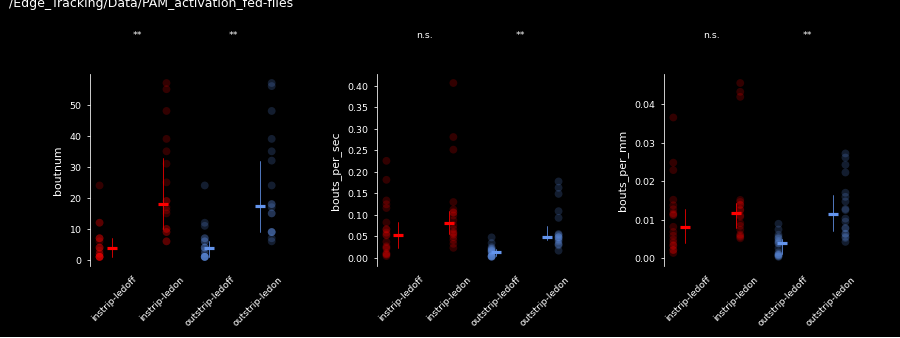

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the

In [72]:
estimator = 'median'
plot_vars = ['boutnum', 'bouts_per_sec', 'bouts_per_mm']
xorder = ['instrip-ledoff', 'instrip-ledon', 'outstrip-ledoff', 'outstrip-ledon']
epoch_palette = dict((k, instrip_palette2['instrip']) \
                     if 'instrip' in k else (k, instrip_palette2['outstrip']) for k in xorder)

fig, axn = pl.subplots(1, len(plot_vars), sharex=True, figsize=(8,3))

for ax, pvar in zip(axn.flat, plot_vars):
    sns.stripplot(data=durlen, x='epoch_type', y=pvar, ax=ax, hue='epoch_type', 
                  palette=epoch_palette, 
                  order=xorder, dodge=True, jitter=False , alpha=0.2, legend=0)
    sns.pointplot(data=durlen, x='epoch_type', y=pvar, ax=ax, hue='epoch_type', 
                  palette=epoch_palette, estimator=estimator,
                  order=xorder, dodge=True, markers='_', color='w', scale=1, errwidth=0.5, 
                  join=False)
    ax.legend_.remove()
    ax.set_box_aspect(1)
    ax.set_xlabel('')
    # stats
    for bi, bout in enumerate(['instrip', 'outstrip']):
        a = durlen[durlen['epoch_type']=='{}-ledoff'.format(bout)][pvar].values
        b = durlen[durlen['epoch_type']=='{}-ledon'.format(bout)][pvar].values
        ks = st.ks_2samp(a, b)
        stat_string = 'ks: {:.2f}, p: {:.2f}'.format(ks['ks_stat'], ks['p_value'])
        if ks['p_value']<0.05:
            annot = '**' if ks['p_value']<0.01 else '*'
        else:
            annot='n.s.'
        ax.text(bi*2 + 0.5, ax.get_ylim()[-1]*1.2, annot, fontsize=6, ha='center')
    # axes
    putil.set_outward_spines(ax)
    putil.remove_spines(ax, axes=['right', 'top', 'bottom'])

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_xlabel('')
            
pl.subplots_adjust(left=0.1, right=0.95, wspace=0.50)
util.label_figure(fig, fig_id)

curr_figdir = os.path.join(figdir, 'ets')
pl.savefig(os.path.join(curr_figdir, 'bouts_per_sec.png'))


# sorted hists

In [182]:
instrip_palette = {True: 'r', False: 'cornflowerblue'}
curr_figdir = os.path.join(figdir, 'ets')
epoch_palette = {'ledon': 'magenta', 'ledoff': 'gray'}

In [183]:
vars_to_flip = ['duration', 'speed_abs', 'path_length', 
                'path_length_x', 'path_length_y', 'crosswind_dist_range', 
                'upwind_speed_abs', 'upwind_dist_range', 'crosswind_speed_abs',
                'max_dist_from_edge', 'min_dist_from_edge', 
                'max_dist_from_edge_abs', 'min_dist_from_edge_abs']
boutdf_filt = putil.flip_data_for_abutting_hists(boutdf_filt, vars_to_flip=vars_to_flip)

/tmp/ipykernel_1279823/1305961820.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med_vals = plotdf.groupby(['instrip', 'epoch']).mean().reset_index()


<IPython.core.display.Javascript object>


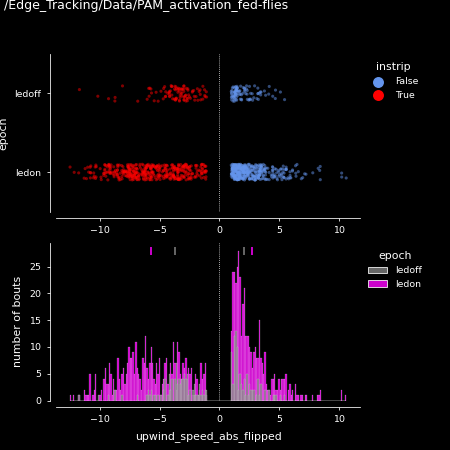

In [189]:
varn = 'upwind_speed'
offset=1
estimator='mean'
# ------------
plotdf = boutdf_filt.copy()
epoch_palette = {'ledoff': 'gray', 'ledon': 'magenta'}
instrip_palette = {True: 'r', False: 'cornflowerblue'}
curr_figdir = os.path.join(figdir, 'ets')

plotvar = '{}_abs_flipped'.format(varn) if 'speed' in varn else '{}_flipped'.format(varn)
nbins = 20 if varn=='path length' else 200 #if 

plotdf = putil.flip_data_for_abutting_hists(plotdf, offset=offset)

if estimator=='median':
    med_vals = plotdf.groupby(['instrip', 'epoch']).median().reset_index()
else:
    med_vals = plotdf.groupby(['instrip', 'epoch']).mean().reset_index()

fig = pl.figure(figsize=(4,4)) # sharex=True)
gs = mpl.gridspec.GridSpec(2,1, figure=fig )
# create sub plots as grid
ax1 = fig.add_subplot(gs[0:1])
ax.tick_params(which='both', axis='both', length=2, width=0.5, color='w',
               direction='out', left=True, bottom=True)
sns.stripplot(data=plotdf, x=plotvar, ax=ax1, 
            y='epoch', order=['ledoff', 'ledon'],
            hue='instrip', palette=instrip_palette, edgecolor='none', dodge=False,
            alpha=0.5, s=2)
ax1.set_xlabel('')
sns.move_legend(ax1, loc='upper left', bbox_to_anchor=(1,1), frameon=False)

ax2 = fig.add_subplot(gs[1], sharex=ax1)
# histogram underneath
vmin, vmax = plotdf[plotvar].min(), plotdf[plotvar].max()
for col, (cond, df_) in zip(['w','r'], plotdf.groupby('instrip')):
    vals = df_[plotvar].values
    bins = np.linspace(vmin, vmax, nbins) #vals.min(), vals.max(), 200)
    sns.histplot(data=df_, bins=bins, x=plotvar, hue='epoch', palette=epoch_palette, ax=ax2, alpha=0.8, fill=True,
                lw=0.5, edgecolor='w')

# plot medians
for (is_instrip, epoch), mv in med_vals.groupby(['instrip', 'epoch']): 
    #ax2.axvline(x=float(mv[plotvar]), color=epoch_palette[epoch], lw=0.5)
    ylim = ax2.get_ylim()[-1]*0.95
    ax2.plot(float(mv[plotvar]), ylim, marker='|', color=epoch_palette[epoch], markersize=5)
sns.move_legend(ax2, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
ax2.set_ylabel('number of bouts')

for ax in fig.axes:
    ax.tick_params(which='both', axis='both', length=2, width=0.5, color='w',
                   direction='out', left=True, bottom=True)
    for pos in ['right', 'top']:
       ax.spines[pos].set_visible(False)
    #ax.set_box_aspect(1)
    ax.axvline(x=0, linestyle=':', lw=0.5, color='w')
    
sns.despine(offset=4)
pl.subplots_adjust(right=0.8)
util.label_figure(fig, fig_id)

pl.savefig(os.path.join(curr_figdir, 'sortedhist_{}.png'.format(varn)))
pl.savefig(os.path.join(curr_figdir, 'sortedhist_{}.svg'.format(varn)))


<IPython.core.display.Javascript object>


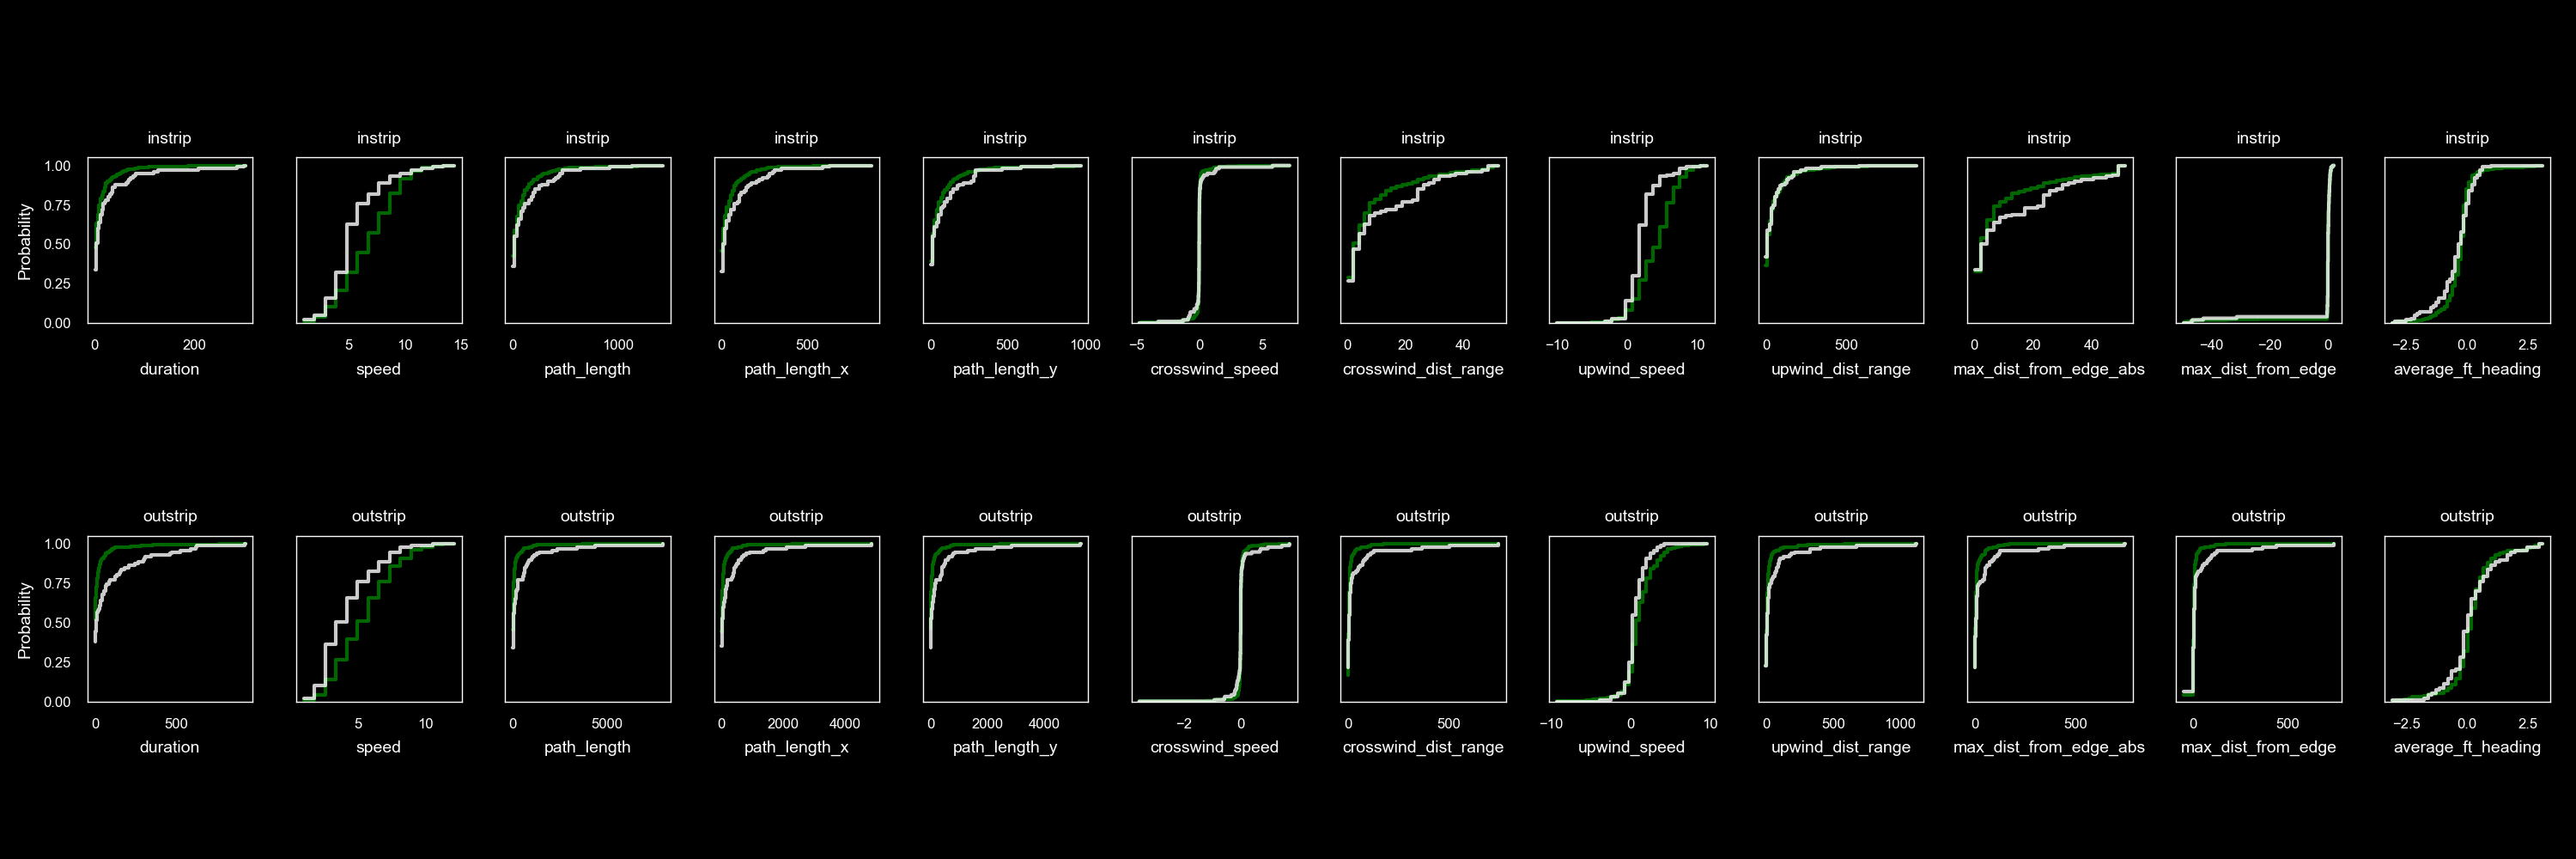

In [894]:
fig, axn = pl.subplots(2, len(plotvars), figsize=(15,5), sharex=False, sharey=True)
for ri, (bout_type, df_) in enumerate(plotdf.groupby('bout_type')):
    for ci, varn in enumerate(plotvars):
        ax=axn[ri, ci]
        sns.histplot(data=df_, x=varn, hue='epoch', palette=epoch_palette, ax=ax, alpha=0.8, fill=False,
                    cumulative=True, common_norm=False, stat='probability', element='step', kde=False)
        ax.set_title(bout_type)
        ax.legend_.remove()
        ax.set_box_aspect(1)
pl.tight_layout()

# Other full-trajectory metrics (as opposed to averaged per bout)
- total upwind dist
- average upwind speed

In [128]:
#boutdf_filt['bout_type'] = ['instrip' if i==True else 'outstrip' for i in boutdf_filt['instrip']]
totals_boutdf = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False).sum()
totals_boutdf['bout_type'] = ['instrip' if i==True else 'outstrip' for i in totals_boutdf['instrip']]
totals_oneper = totals_boutdf.groupby(['fly_id', 'epoch', 'instrip', 'bout_type'], as_index=False).mean()


/tmp/ipykernel_1279823/3117340622.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals_boutdf = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False).sum()
/tmp/ipykernel_1279823/3117340622.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totals_oneper = totals_boutdf.groupby(['fly_id', 'epoch', 'instrip', 'bout_type'], as_index=False).mean()


<IPython.core.display.Javascript object>


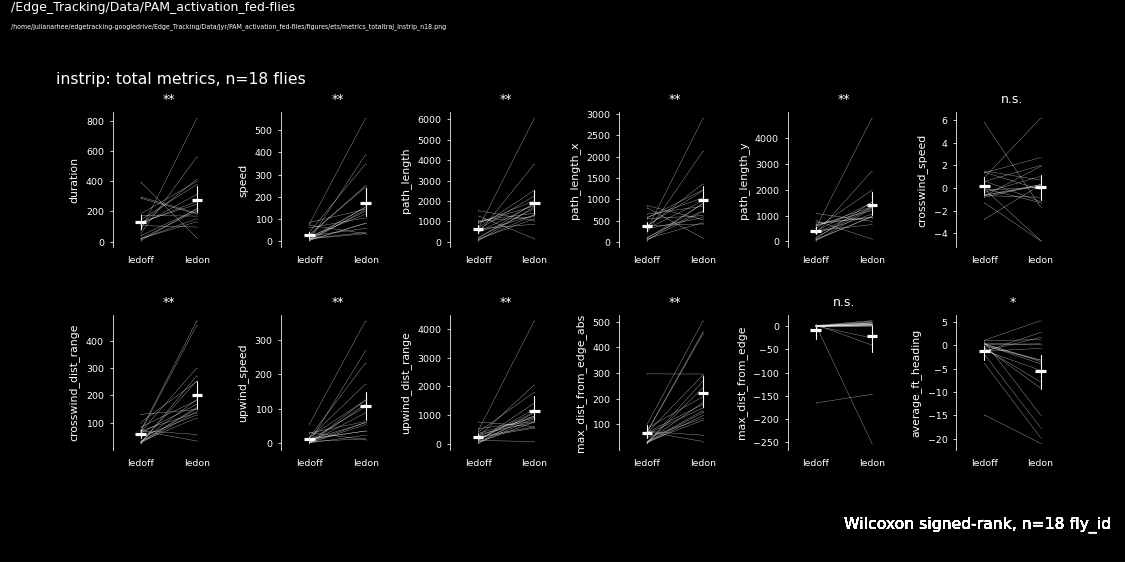

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/julianarhee/Repositories/plume-tracking/plotting.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oneval_per= df_.groupby([pair_by, xvarname], as_index=False).mean()
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may c

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets/metrics_totaltraj_instrip_n18.png


<IPython.core.display.Javascript object>


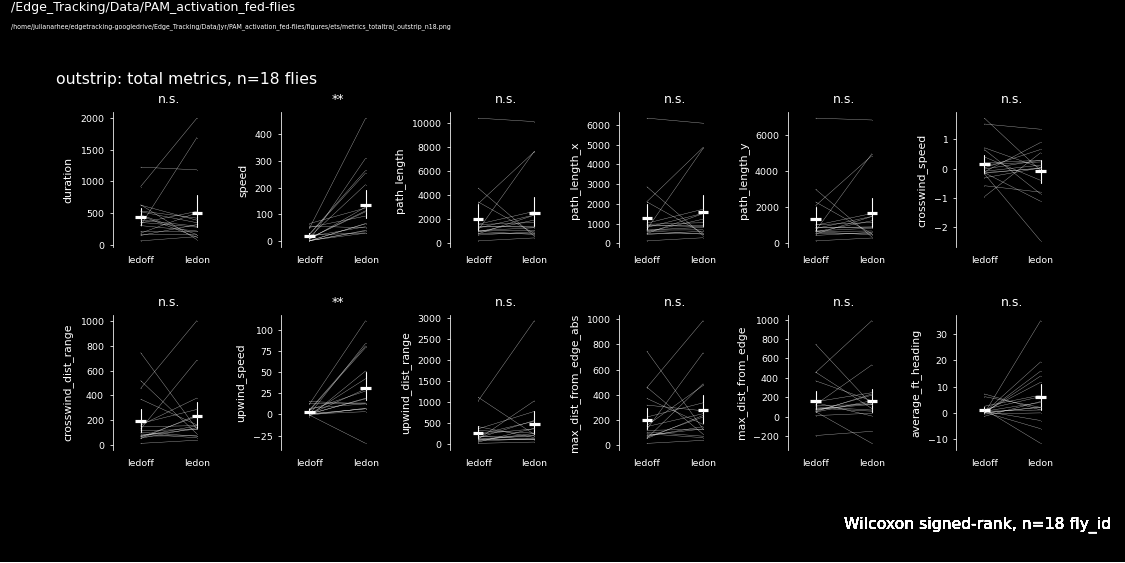

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/julianarhee/Repositories/plume-tracking/plotting.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oneval_per= df_.groupby([pair_by, xvarname], as_index=False).mean()
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may c

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures/ets/metrics_totaltraj_outstrip_n18.png


In [130]:
conds = ['instrip', 'outstrip']
dfs = [totals_oneper[totals_oneper['instrip']], totals_oneper[~totals_oneper['instrip']]]

for currcond, df_ in zip(conds, dfs):
#     fig = putil.plot_paired_inout_metrics(df_, pair_by='fly_id', 
#                 xvarname='epoch', yvarnames=yvarnames, nr=2, nc=6,
#                 xticklabels=['ledoff', 'ledon'], order=['ledoff', 'ledon'])
#     util.label_figure(fig, fig_id)
#     fig.text(0.05, 0.95, currcond, fontsize=10)
    
    fig = putil.plot_paired_inout_metrics(df_, pair_by='fly_id', 
                xvarname='epoch', yvarnames=yvarnames, nr=2, nc=6,
                xticklabels=['ledoff', 'ledon'], order=['ledoff', 'ledon'],
                line_markersize=0.3, lw=0.25, alpha=0.7, plot_mean=True, errwidth=0.7)
    fig.text(0.05, 0.85, '{}: total metrics, n={} flies'.format(currcond, len(fly_ids)), fontsize=10)
    pl.subplots_adjust(top=0.8)
    util.label_figure(fig, fig_id)

    figname = 'metrics_totaltraj_{}_n{}'.format(currcond, len(fly_ids))
    fig.text(0.01, 0.95, os.path.join(curr_figdir, '{}.png'.format(figname)), fontsize=4)

    pl.savefig(os.path.join(curr_figdir, '{}.png'.format(figname)))
    pl.savefig(os.path.join(curr_figdir, '{}.svg'.format(figname)))
    print(os.path.join(curr_figdir, '{}.png'.format(figname)))
    

# sum

In [132]:
# select variables and colors to plot
yvarnames = ['duration', 'speed','path_length', 
            'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 'crosswind_dist_firstlast',
            'upwind_speed', 'upwind_dist_range','upwind_dist_firstlast',
             'dist_from_edge', 'dist_from_edge_abs',
            'max_dist_from_edge_abs', 'max_dist_from_edge', 'average_ft_heading']

In [148]:
estimator='median'
# -----------------------
if estimator=='max':
    metrics = boutdf.groupby(['fly_id', 'condition', 'epoch', 'instrip'], as_index=False).max()
elif estimator == 'mean':
    metrics = boutdf.groupby(['fly_id', 'condition', 'epoch', 'instrip'], as_index=False).mean()
else: #estimator should be median
    metrics = boutdf.groupby(['fly_id', 'condition', 'epoch', 'instrip'], as_index=False).median()
metrics['bout_type'] = ['instrip' if v==True else 'outstrip' for v in metrics['instrip']]
metrics['epoch_type'] = ['{}-{}'.format(a, b) for a, b in metrics[['bout_type', 'epoch']].values]

# mean_boutdf = boutdf_filt.groupby(\
#                 ['fly_id', 'instrip', 'condition', 'bout_type', 'epoch'], \
#                 as_index=False).mean()#.reset_index()

/tmp/ipykernel_1279823/3675081969.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metrics = boutdf.groupby(['fly_id', 'condition', 'epoch', 'instrip'], as_index=False).median()


#### add MAX y pos

In [149]:
maxy = etdf_zero.groupby(['fly_id', 'filename', 'epoch', 'instrip', 'condition'], \
                    as_index=False)['ft_posy'].max()
print(maxy.shape, boutdf.shape)

etdf_zero['ft_posx_abs'] = etdf_zero['ft_posx'].abs()
maxx = etdf_zero.groupby(['fly_id', 'filename', 'epoch', 'instrip', 'condition'], \
                    as_index=False)['ft_posx_abs'].max()
print(maxx.shape)

(74, 6) (1046, 58)
(74, 6)


In [150]:
maxy.shape, metrics.shape
metrics.pop('boutnum')
metrics.pop('ft_posy')
metrics.head()

,fly_id,condition,epoch,instrip,average_ft_heading,crosswind_dist,crosswind_dist_firstlast,crosswind_dist_range,crosswind_speed,cum_time,...,rel_time,sig_status,speed,time,upwind_dist,upwind_dist_firstlast,upwind_dist_range,upwind_speed,bout_type,epoch_type
0,20200815-fly2,lights,ledon,False,0.368214,0.107918,-0.006998,3.592474,0.002326,7.257036e+06,...,488.469008,NaN,5.753690,1.597525e+09,0.087510,3.949591,4.898104,1.172702,outstrip,outstrip-ledon
1,20200815-fly2,lights,ledon,True,-0.198561,0.105783,-0.012158,1.855696,0.004036,7.240437e+06,...,487.908510,NaN,7.074605,1.597525e+09,0.019595,8.618705,8.864849,5.260374,instrip,instrip-ledon
2,20200815-fly2,no_lights,ledoff,False,-0.129015,0.093260,48.455372,49.648353,0.139082,1.074518e+04,...,18.783743,NaN,3.159535,1.597524e+09,-0.094719,33.507488,57.143527,0.096901,outstrip,outstrip-ledoff
3,20200815-fly2,no_lights,ledoff,True,0.735070,0.005111,24.962890,25.970920,1.339264,0.000000e+00,...,0.000000,NaN,4.162541,1.597524e+09,0.134216,37.215942,37.942242,1.978044,instrip,instrip-ledoff
4,20200816-fly5,lights,ledon,False,0.330636,0.148783,-0.006421,2.771622,0.003146,3.534441e+06,...,341.186097,NaN,5.861862,1.597614e+09,0.085467,4.315933,7.393424,1.519973,outstrip,outstrip-ledon


In [151]:
metrics = pd.merge(metrics, maxy, on=['fly_id', 'instrip', 'condition', 'epoch'] )
print(metrics.shape, metrics.dropna().shape)
yvarnames.append('ft_posy')

(74, 47) (8, 47)


In [152]:
metrics_oneper = metrics.groupby(['fly_id', 'epoch', 'instrip', 'bout_type', 'epoch_type'], as_index=False).mean()
# Merge for easier plotting
meltdf_metrics = pd.melt(metrics_oneper, id_vars=['fly_id', 'bout_type', 'epoch', 'epoch_type'],
               value_vars=yvarnames, value_name='value')
meltdf_metrics['value'] = meltdf_metrics['value'].astype(float)

/tmp/ipykernel_1279823/805345114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metrics_oneper = metrics.groupby(['fly_id', 'epoch', 'instrip', 'bout_type', 'epoch_type'], as_index=False).mean()


In [153]:
plotvars = ['duration', 'speed','path_length', 
            'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 
            'upwind_speed', 'upwind_dist_range', 
            'max_dist_from_edge_abs', 'ft_posy', 'average_ft_heading'] #, 'max_dist_from_edge', 'average_ft_heading']
print(len(plotvars))
plotdf = meltdf_metrics[meltdf_metrics['variable'].isin(plotvars)].copy()


12


<IPython.core.display.Javascript object>


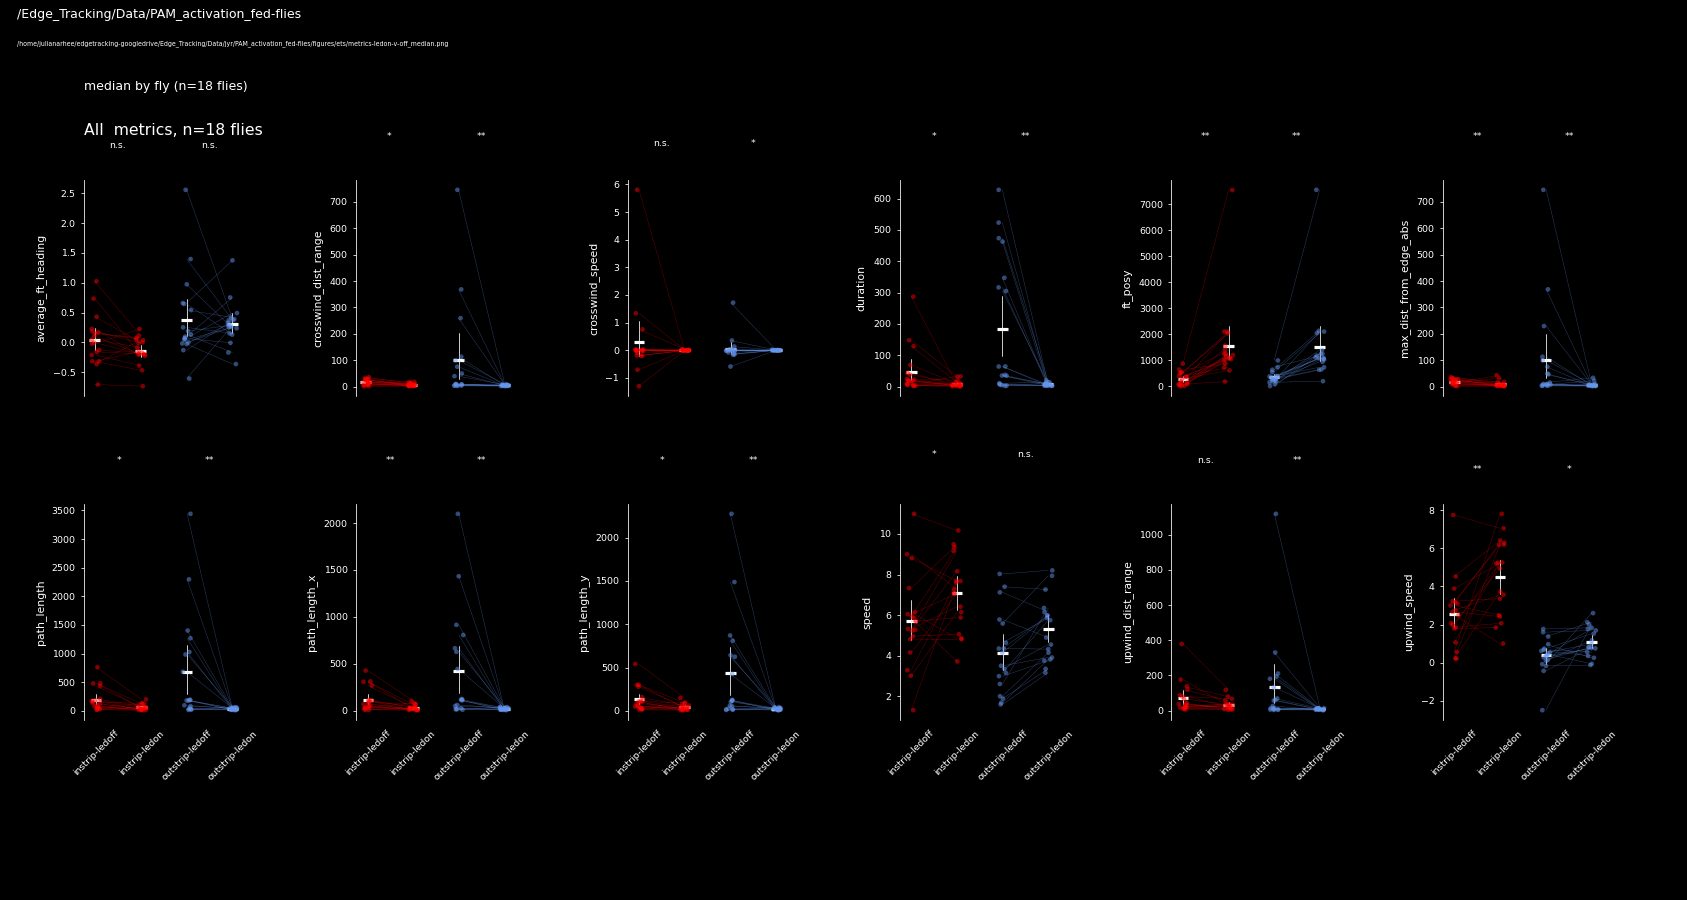

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0), (1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0), (1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 1.0, 1.0), (1.0, 1.0, 1.0), (1.0, 1.0, 1.0), (1.0, 1.0, 1.0)]) for an unfilled marker ('_').  Matplotlib is ign

In [155]:
# plot all paird metrics
crossfly_estimator='mean'
plotdf = meltdf_metrics[meltdf_metrics['variable'].isin(plotvars)].copy()
xorder = ['instrip-ledoff', 'instrip-ledon', 'outstrip-ledoff', 'outstrip-ledon']
epochtypes_palette = dict((k, instrip_palette2['instrip']) if 'instrip' in k else (k, instrip_palette2['outstrip']) for k in xorder)

nr=2
nc=6
lw=0.25
alpha=0.5
fig, axn = pl.subplots(nr, nc, figsize=(15, 8))
# plot bout metrics
ci = 0; ri = 0;
for cond, cond_df in plotdf.groupby('variable'):
    if ci >= nc:
        ci = 0; ri = 1;
    ax=axn[ri, ci]
    sns.pointplot(data=cond_df, x='epoch_type', y='value', order=xorder, ax=ax, 
                  markers='_', color='w', scale=1, errwidth=0.5, join=False,
                  estimator=crossfly_estimator) #, jitter=False)
    sns.stripplot(data=cond_df, x='epoch_type', y ='value', order=xorder, 
                  hue='epoch_type', hue_order=xorder, palette=epochtypes_palette,
                  ax=ax, c='w', s=3, alpha=0.5, jitter=True, legend=0)
    ci+=1
    ax.set_ylabel(cond)
    # stats
    for bi, bout in enumerate(['instrip', 'outstrip']):
        a = cond_df[cond_df['epoch_type']=='{}-ledoff'.format(bout)]['value'].values
        b = cond_df[cond_df['epoch_type']=='{}-ledon'.format(bout)]['value'].values
        xs = np.array([ [0]*len(a), [1]*len(a) ]) + (bi*2)
        ys = np.array([a, b])
        ax.plot(xs, ys, color=instrip_palette2[bout], alpha=alpha, lw=lw)
        ks = st.ks_2samp(a, b)
        stat_string = 'ks: {:.2f}, p: {:.2f}'.format(ks['ks_stat'], ks['p_value'])
        if ks['p_value']<0.05:
            annot = '**' if ks['p_value']<0.01 else '*'
        else:
            annot='n.s.'
        ax.text(bi*2 + 0.5, ax.get_ylim()[-1]*1.2, annot, fontsize=6, ha='center')
    # axes
    putil.set_outward_spines(ax)
    putil.remove_spines(ax, axes=['right', 'top', 'bottom'])
    if ri==0:
        ax.set_xlabel('')
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
        ax.set_xlabel('')


fig.text(0.05, 0.85, 'All  metrics, n={} flies'.format(len(fly_ids)), fontsize=10)
pl.subplots_adjust(top=0.8)
util.label_figure(fig, fig_id)

figname = 'metrics-ledon-v-off_{}'.format( estimator)
fig.text(0.01, 0.95, os.path.join(curr_figdir, '{}.png'.format(figname)), fontsize=4)
fig.text(0.05, 0.9, '{} by fly (n={} flies)'.format(estimator, len(fly_ids)), fontsize=8)

pl.subplots_adjust(wspace=0.7, hspace=0.5, bottom=0.2, top=0.8, left=0.05, right=0.95)
pl.savefig(os.path.join(curr_figdir, '{}.png'.format(figname)))
pl.savefig(os.path.join(curr_figdir, '{}.svg'.format(figname)))


In [1181]:
totals.dropna()

,fly_id,condition,epoch,instrip,average_ft_heading,boutnum,crosswind_dist,crosswind_dist_firstlast,crosswind_dist_range,crosswind_speed,...,speed,time,upwind_dist,upwind_dist_firstlast,upwind_dist_range,upwind_speed,bout_type,epoch_type,filename,ft_posy_y
64,20230222-fly1,lights,ledoff,False,-0.071484,12.0,0.040730,-0.020187,2.892721,-0.000635,...,3.403241,1.677095e+09,0.009925,2.780724,4.484185,0.478233,outstrip,outstrip-ledoff,20230222-142948_PAM_activation_fly1-PAM-ChR-fe...,499.967068
65,20230222-fly1,lights,ledoff,True,-0.850296,12.0,0.046647,0.002675,1.877928,-0.001775,...,4.961918,1.677095e+09,-0.018083,5.651391,6.104537,1.965977,instrip,instrip-ledoff,20230222-142948_PAM_activation_fly1-PAM-ChR-fe...,498.095651
66,20230222-fly1,lights,ledon,False,-0.362545,55.0,0.050030,-0.008206,1.653274,0.000842,...,3.916790,1.677097e+09,0.008243,1.548027,3.392718,0.349014,outstrip,outstrip-ledon,20230222-142948_PAM_activation_fly1-PAM-ChR-fe...,2051.766899
67,20230222-fly1,lights,ledon,True,-0.733406,55.0,0.049246,0.003593,2.039582,-0.001750,...,4.812570,1.677097e+09,0.000174,3.875831,4.069387,2.064028,instrip,instrip-ledon,20230222-142948_PAM_activation_fly1-PAM-ChR-fe...,2040.090258
70,20230222-fly3,lights,ledoff,False,0.660408,2.0,0.135252,-0.024432,9.929394,-0.019015,...,2.997029,1.677103e+09,0.091979,23.798174,26.348692,0.467588,outstrip,outstrip-ledoff,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,198.341380
71,20230222-fly3,lights,ledoff,True,0.167758,2.0,0.102518,12.410786,35.770634,-0.203058,...,5.323887,1.677103e+09,0.035425,379.034580,379.034580,2.751944,instrip,instrip-ledoff,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,499.961879
72,20230222-fly3,lights,ledon,False,1.375887,10.0,0.101534,-0.005784,1.986510,0.021001,...,3.764038,1.677103e+09,0.084138,0.059326,2.537858,-0.063065,outstrip,outstrip-ledon,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,1401.058149
73,20230222-fly3,lights,ledon,True,0.048086,10.0,0.126763,0.012459,11.444931,-0.014316,...,6.418011,1.677103e+09,-0.005605,117.412143,117.453439,3.568128,instrip,instrip-ledon,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,1400.096666


In [1099]:
col = ['fly_id', 'filename', 'epoch', 'instrip', 'boutnum', 'condition']
x = boutdf[col].sort_values(by=col).copy()

In [1100]:
y = maxy[col].sort_values(by=col).copy()

In [1120]:
for i, v in y.iterrows():
    match = [vv for ii, vv in x.iterrows() if all(vv.values == v.values)]
    if len(match)==0:
        print(i, v)
        break

778 fly_id                                           20230201-fly1
filename     20230201-110341_PAM_activation_fly1-PAM-ChR-fe...
epoch                                                   ledoff
instrip                                                  False
boutnum                                                     14
condition                                               lights
Name: 778, dtype: object


In [1133]:
v

fly_id                                           20230201-fly1
filename     20230201-110341_PAM_activation_fly1-PAM-ChR-fe...
epoch                                                   ledoff
instrip                                                  False
boutnum                                                     14
condition                                               lights
Name: 778, dtype: object

In [1138]:
maxy[(maxy['filename']==v['filename']) & (maxy['boutnum']==v['boutnum'])] #[['fly_id', 'filename', 'epoch', 'instrip', 'condition']].drop_duplicates()

,fly_id,filename,epoch,instrip,boutnum,condition,ft_posy
778,20230201-fly1,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,ledoff,False,14,lights,999.977150
787,20230201-fly1,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,ledon,False,14,lights,1169.633146


In [1143]:
boutdf[(boutdf['filename']==v['filename']) & (boutdf['boutnum']==v['boutnum'])][['fly_id', 'filename', 'epoch', 'instrip', 'condition']].drop_duplicates()

,fly_id,filename,epoch,instrip,condition
785,20230201-fly1,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,ledon,False,lights


In [1144]:
maxy[(maxy['filename']==v['filename']) & (maxy['boutnum']==v['boutnum'])][['fly_id', 'filename', 'epoch', 'instrip', 'condition']].drop_duplicates()

,fly_id,filename,epoch,instrip,condition
778,20230201-fly1,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,ledoff,False,lights
787,20230201-fly1,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,ledon,False,lights


In [1160]:
cnts = maxy.groupby(['filename', 'boutnum'], as_index=False).count()
cnts

,filename,boutnum,fly_id,epoch,instrip,condition,ft_posy
0,08152020-163802_Fly2_fed_no_lights,1,1,1,1,1,1
1,08152020-163802_Fly2_fed_no_lights,2,1,1,1,1,1
2,08152020-164450_Fly2_fed_lights,1,1,1,1,1,1
3,08152020-164450_Fly2_fed_lights,2,1,1,1,1,1
4,08152020-164450_Fly2_fed_lights,3,1,1,1,1,1
...,...,...,...,...,...,...,...
1041,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,12,1,1,1,1,1
1042,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,13,1,1,1,1,1
1043,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,14,1,1,1,1,1
1044,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,15,1,1,1,1,1


In [1162]:
cnts[cnts['fly_id']>1]

,filename,boutnum,fly_id,epoch,instrip,condition,ft_posy
779,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,8,2,2,2,2,2
785,20230201-110341_PAM_activation_fly1-PAM-ChR-fe...,14,2,2,2,2,2
967,20230222-142948_PAM_activation_fly1-PAM-ChR-fe...,24,2,2,2,2,2
1032,20230222-164642_PAM_activation_fly3-PAM-ChR-fe...,3,2,2,2,2,2


In [1166]:
boutdf[boutdf['fly_id']=='20230201-fly1']['filename'].unique()


array(['20230201-110341_PAM_activation_fly1-PAM-ChR-fed-ythresh1000_000'],
      dtype=object)

### check gradient odor strip

In [10]:
mfc_dict={}
for logfn, df_ in df0_all.groupby('filename'):
    mfc_ = butil.get_mfc_params(df_)
    mfc_dict.update({logfn: mfc_})

In [12]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [13]:
pp.pprint(mfc_dict)

{   '09142020-103649_Fly0_fed_no_lights': {   'air_max': 0.975975975975976,
                                              'air_mfc': 'mfc1_stpt',
                                              'air_min': 0.9286590584709428,
                                              'odor_mfc': 'mfc3_stpt',
                                              'odor_mfc_max': 0.0473169175050331,
                                              'odor_mfc_min': 0.0088887004922089,
                                              'percent_odor': 0.048},
    '09142020-104819_Fly0_fed_single': {   'air_max': 0.975975975975976,
                                           'air_mfc': 'mfc1_stpt',
                                           'air_min': 0.0933742285698289,
                                           'odor_mfc': 'mfc3_stpt',
                                           'odor_mfc_max': 0.882601747406147,
                                           'odor_mfc_min': 0.009537807160219,
                                  